In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading data
df1 = pd.read_csv('/content/ancona_data.csv')
df2 = pd.read_csv('/content/athens_data.csv')

# seeing sample of data
print(df1.head())
print(df2.head())

                  Date        NO2         O3       PM10     PM2.5   Latitude  \
0  2021-09-01 01:00:00   7.000000  53.000000  15.000000  4.000000  43.612386   
1  2021-09-01 01:00:00   8.000000        NaN   9.000000       NaN  43.527982   
2  2021-09-01 01:00:00   9.035176  49.232338  10.681684  7.700312  43.450000   
3  2021-09-01 01:00:00  10.292098  51.336113  10.310384  6.732396  43.550000   
4  2021-09-01 01:00:00   8.348963  39.351303  10.273862  7.066792  43.550000   

   Longitude            station_name  Wind-Speed (U)  Wind-Speed (V)  \
0  13.510830        Ancona Citadella       -0.528286       -0.987673   
1  13.246672                    Jesi       -0.529657       -0.987282   
2  13.250000  Ancona CAMS Station 11       -0.529798       -0.987225   
3  13.450000   Ancona CAMS Station 8       -0.528619       -0.987565   
4  13.150000   Ancona CAMS Station 5       -0.530069       -0.987179   

   Dewpoint Temp  Soil Temp  Total Percipitation  Vegitation (High)  \
0      63.56378

In [3]:
columns_ord = df1.columns

# Re-ordering the columns of 2nd dataframe as 1st dataframe
df2 = df2[columns_ord]

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417626 entries, 0 to 417625
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 417626 non-null  object 
 1   NO2                  409848 non-null  float64
 2   O3                   392823 non-null  float64
 3   PM10                 389767 non-null  float64
 4   PM2.5                372508 non-null  float64
 5   Latitude             417626 non-null  float64
 6   Longitude            417626 non-null  float64
 7   station_name         417626 non-null  object 
 8   Wind-Speed (U)       417626 non-null  float64
 9   Wind-Speed (V)       417626 non-null  float64
 10  Dewpoint Temp        417626 non-null  float64
 11  Soil Temp            417626 non-null  float64
 12  Total Percipitation  417626 non-null  float64
 13  Vegitation (High)    417626 non-null  float64
 14  Vegitation (Low)     417626 non-null  float64
 15  Temp             

In [5]:
# converting date column into datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# dropping unnecessary columns
df1 = df1.drop(columns=['id', 'code'])

df2 = df2.drop(columns=['id', 'code'])

In [6]:
df1['Date'].info()
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417626 entries, 0 to 417625
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
417626 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB
<class 'pandas.core.series.Series'>
RangeIndex: 1726464 entries, 0 to 1726463
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1726464 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.2 MB


In [7]:
df1.head(5)

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001


In [8]:
df2.head()


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
1,2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731
2,2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317
3,2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915
4,2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202


In [9]:
df1.isnull().sum().sort_values(ascending=True)

,0
Date,0
station_name,0
Longitude,0
Latitude,0
Soil Temp,0
Dewpoint Temp,0
Wind-Speed (V),0
Wind-Speed (U),0
Total Percipitation,0
Vegitation (High),0


In [10]:
# Assuming you have a DataFrame named 'df1' with a 'Date' column
df1_sorted = df1.sort_values(by=['Date'], ascending=True)
df1_sorted

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.000000,3.184390,2.847654,66.075624,85.422435
21,2021-09-01 01:00:00,9.635486,57.942540,10.488986,6.201891,43.650000,13.350000,Ancona CAMS Station 2,-0.528980,-0.987489,64.159768,67.070568,0.000000,3.183496,2.849381,66.663000,85.472744
20,2021-09-01 01:00:00,25.000000,13.000000,18.000000,8.000000,43.599523,13.342312,Chiarvalle,-0.529081,-0.987451,64.305687,67.216365,0.000000,3.182081,2.849959,66.808977,85.472984
19,2021-09-01 01:00:00,7.454304,58.000107,8.418634,5.803703,43.650000,13.450000,Ancona CAMS Station 3,-0.528536,-0.987612,63.757924,66.669980,0.000000,3.184556,2.848155,66.266151,85.443320
18,2021-09-01 01:00:00,10.455807,36.120407,10.193969,7.274157,43.550000,13.250000,Ancona CAMS Station 6,-0.529598,-0.987302,64.815832,67.725230,0.000000,3.179883,2.851613,67.314415,85.501234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417605,2023-10-31 23:00:00,7.000000,59.000000,NaN,3.000000,43.623906,13.392558,Falconara Alta,-0.578384,-0.669120,10.854955,12.754717,0.011400,2.901160,2.680774,12.481050,89.845833
417604,2023-10-31 23:00:00,11.118244,50.137924,12.163123,7.220167,43.650000,13.450000,Ancona CAMS Station 3,-0.577543,-0.669832,10.854736,12.752656,0.011403,2.902311,2.679673,12.481108,89.844242
417624,2023-10-31 23:00:00,9.926146,50.228462,11.628738,7.146895,43.650000,13.350000,Ancona CAMS Station 2,-0.578728,-0.668755,10.855759,12.757559,0.011393,2.901655,2.681170,12.482271,89.843385
417613,2023-10-31 23:00:00,9.705607,48.170746,10.697131,7.280790,43.450000,13.450000,Ancona CAMS Station 13,-0.578659,-0.669225,10.851639,12.745957,0.011431,2.896195,2.681406,12.475130,89.861075


In [11]:
# Assuming you have a DataFrame named 'df1' with a 'Date' column
df2_sorted = df2.sort_values(by=['Date'], ascending=True)
df2_sorted

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
34,2020-05-01 00:00:00,NaN,NaN,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745
35,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092
36,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787
37,2020-05-01 00:00:00,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726426,2023-05-29 23:00:00,NaN,NaN,17.866667,16.113333,37.97381,23.719069,CleanAir in Greece - Thiseio II,0.206695,-1.264044,13.834846,21.819895,0.000790,0.991183,0.993116,17.333390,79.936127
1726427,2023-05-29 23:00:00,24.308407,61.684834,18.143023,10.256213,37.85000,23.750000,Athens CAMS station 9,0.214275,-1.238656,13.404108,20.834574,0.000768,1.713203,1.426653,16.982458,79.511505
1726428,2023-05-29 23:00:00,29.450640,68.105500,17.861193,11.609172,37.85000,23.650000,Athens CAMS station 8,0.250205,-1.204437,13.413361,20.768693,0.000812,1.691557,1.499634,16.883444,80.055674
1726430,2023-05-29 23:00:00,20.510029,52.980500,18.360280,11.352183,37.95000,23.950000,Athens CAMS station 6,0.201650,-1.244336,13.349600,20.728498,0.000849,1.711001,1.765690,17.005146,79.107080


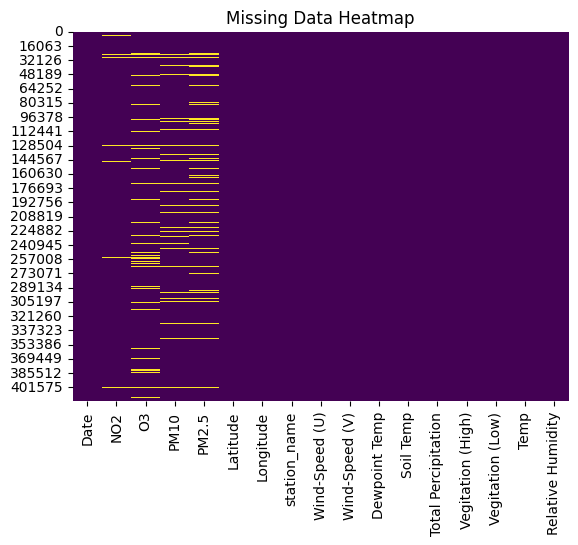

In [12]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [13]:
# Function to fill missing values with upper 3 and down 3 values mean for df1
def fill_missing_values(df1_sorted, column):
    for i in range(len(df1_sorted)):
        if pd.isna(df1_sorted[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df1_sorted[column][i - j]):
                    up_sum += df1_sorted[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df1_sorted):
                if not pd.isna(df1_sorted[column][i + k]):
                    down_sum += df1_sorted[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df1_sorted.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['NO2', 'O3', 'PM10', 'PM2.5']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df1_sorted, column)

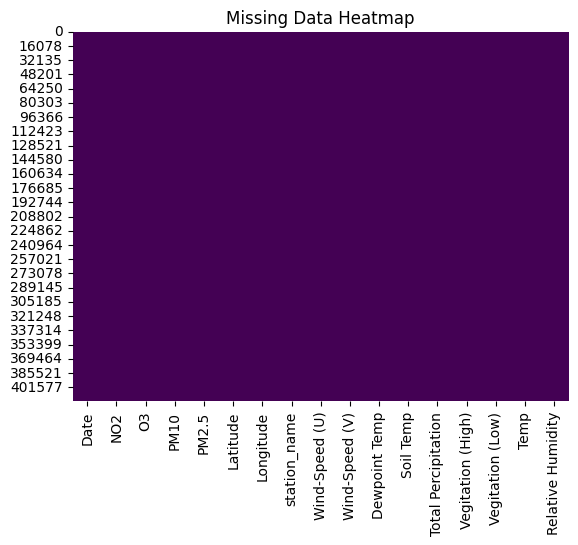

In [14]:
# Visualize missing data (optional)
sns.heatmap(df1_sorted.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

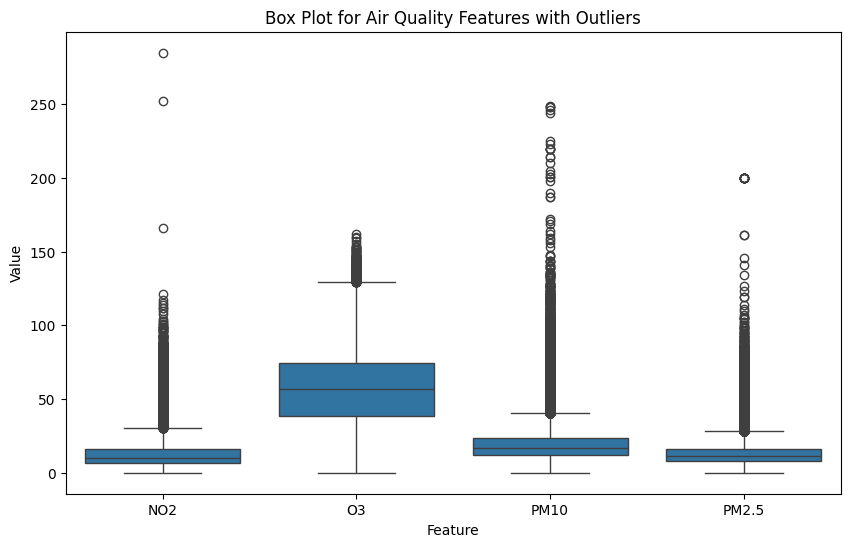

In [15]:
# Melt the DataFrame to long format
df_melted = df1_sorted.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity'],
                     value_vars=['NO2', 'O3', 'PM10', 'PM2.5'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726464 entries, 0 to 1726463
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   NO2                  float64       
 2   O3                   float64       
 3   PM10                 float64       
 4   PM2.5                float64       
 5   Latitude             float64       
 6   Longitude            float64       
 7   station_name         object        
 8   Wind-Speed (U)       float64       
 9   Wind-Speed (V)       float64       
 10  Dewpoint Temp        float64       
 11  Soil Temp            float64       
 12  Total Percipitation  float64       
 13  Vegitation (High)    float64       
 14  Vegitation (Low)     float64       
 15  Temp                 float64       
 16  Relative Humidity    float64       
dtypes: datetime64[ns](1), float64(15), object(1)
memory usage: 223.9+ MB


In [18]:
# checking Null values in dataframe 2
df2_sorted.isnull().sum().sort_values(ascending=True)

,0
Date,0
PM10,0
Latitude,0
PM2.5,0
Longitude,0
station_name,0
Temp,7565
Wind-Speed (U),8573
Soil Temp,8573
Total Percipitation,8573


In [19]:
# Function to fill missing values with upper 3 and down 3 values mean of df2
def fill_missing_values(df2_sorted, column):
    for i in range(len(df2_sorted)):
        if pd.isna(df2_sorted[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df2_sorted[column][i - j]):
                    up_sum += df2_sorted[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df2):
                if not pd.isna(df2_sorted[column][i + k]):
                    down_sum += df2_sorted[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df2_sorted.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['Temp', 'Vegitation (Low)', 'Vegitation (High)', 'Total Percipitation',
    'Soil Temp', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp','Relative Humidity', 'NO2', 'O3']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df2_sorted, column)

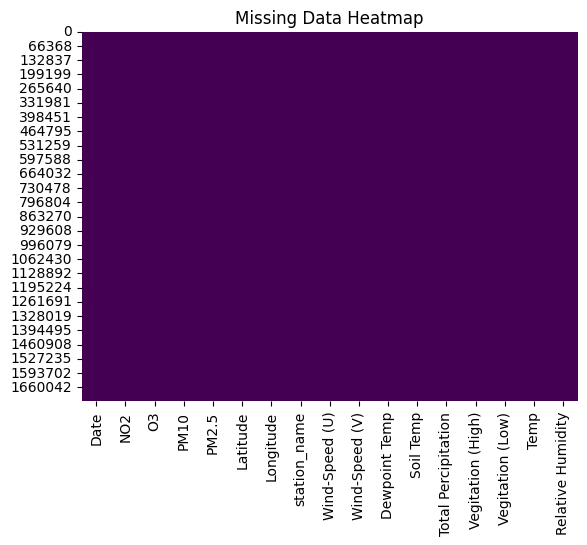

In [20]:
# Visualize missing data (optional)
sns.heatmap(df2_sorted.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

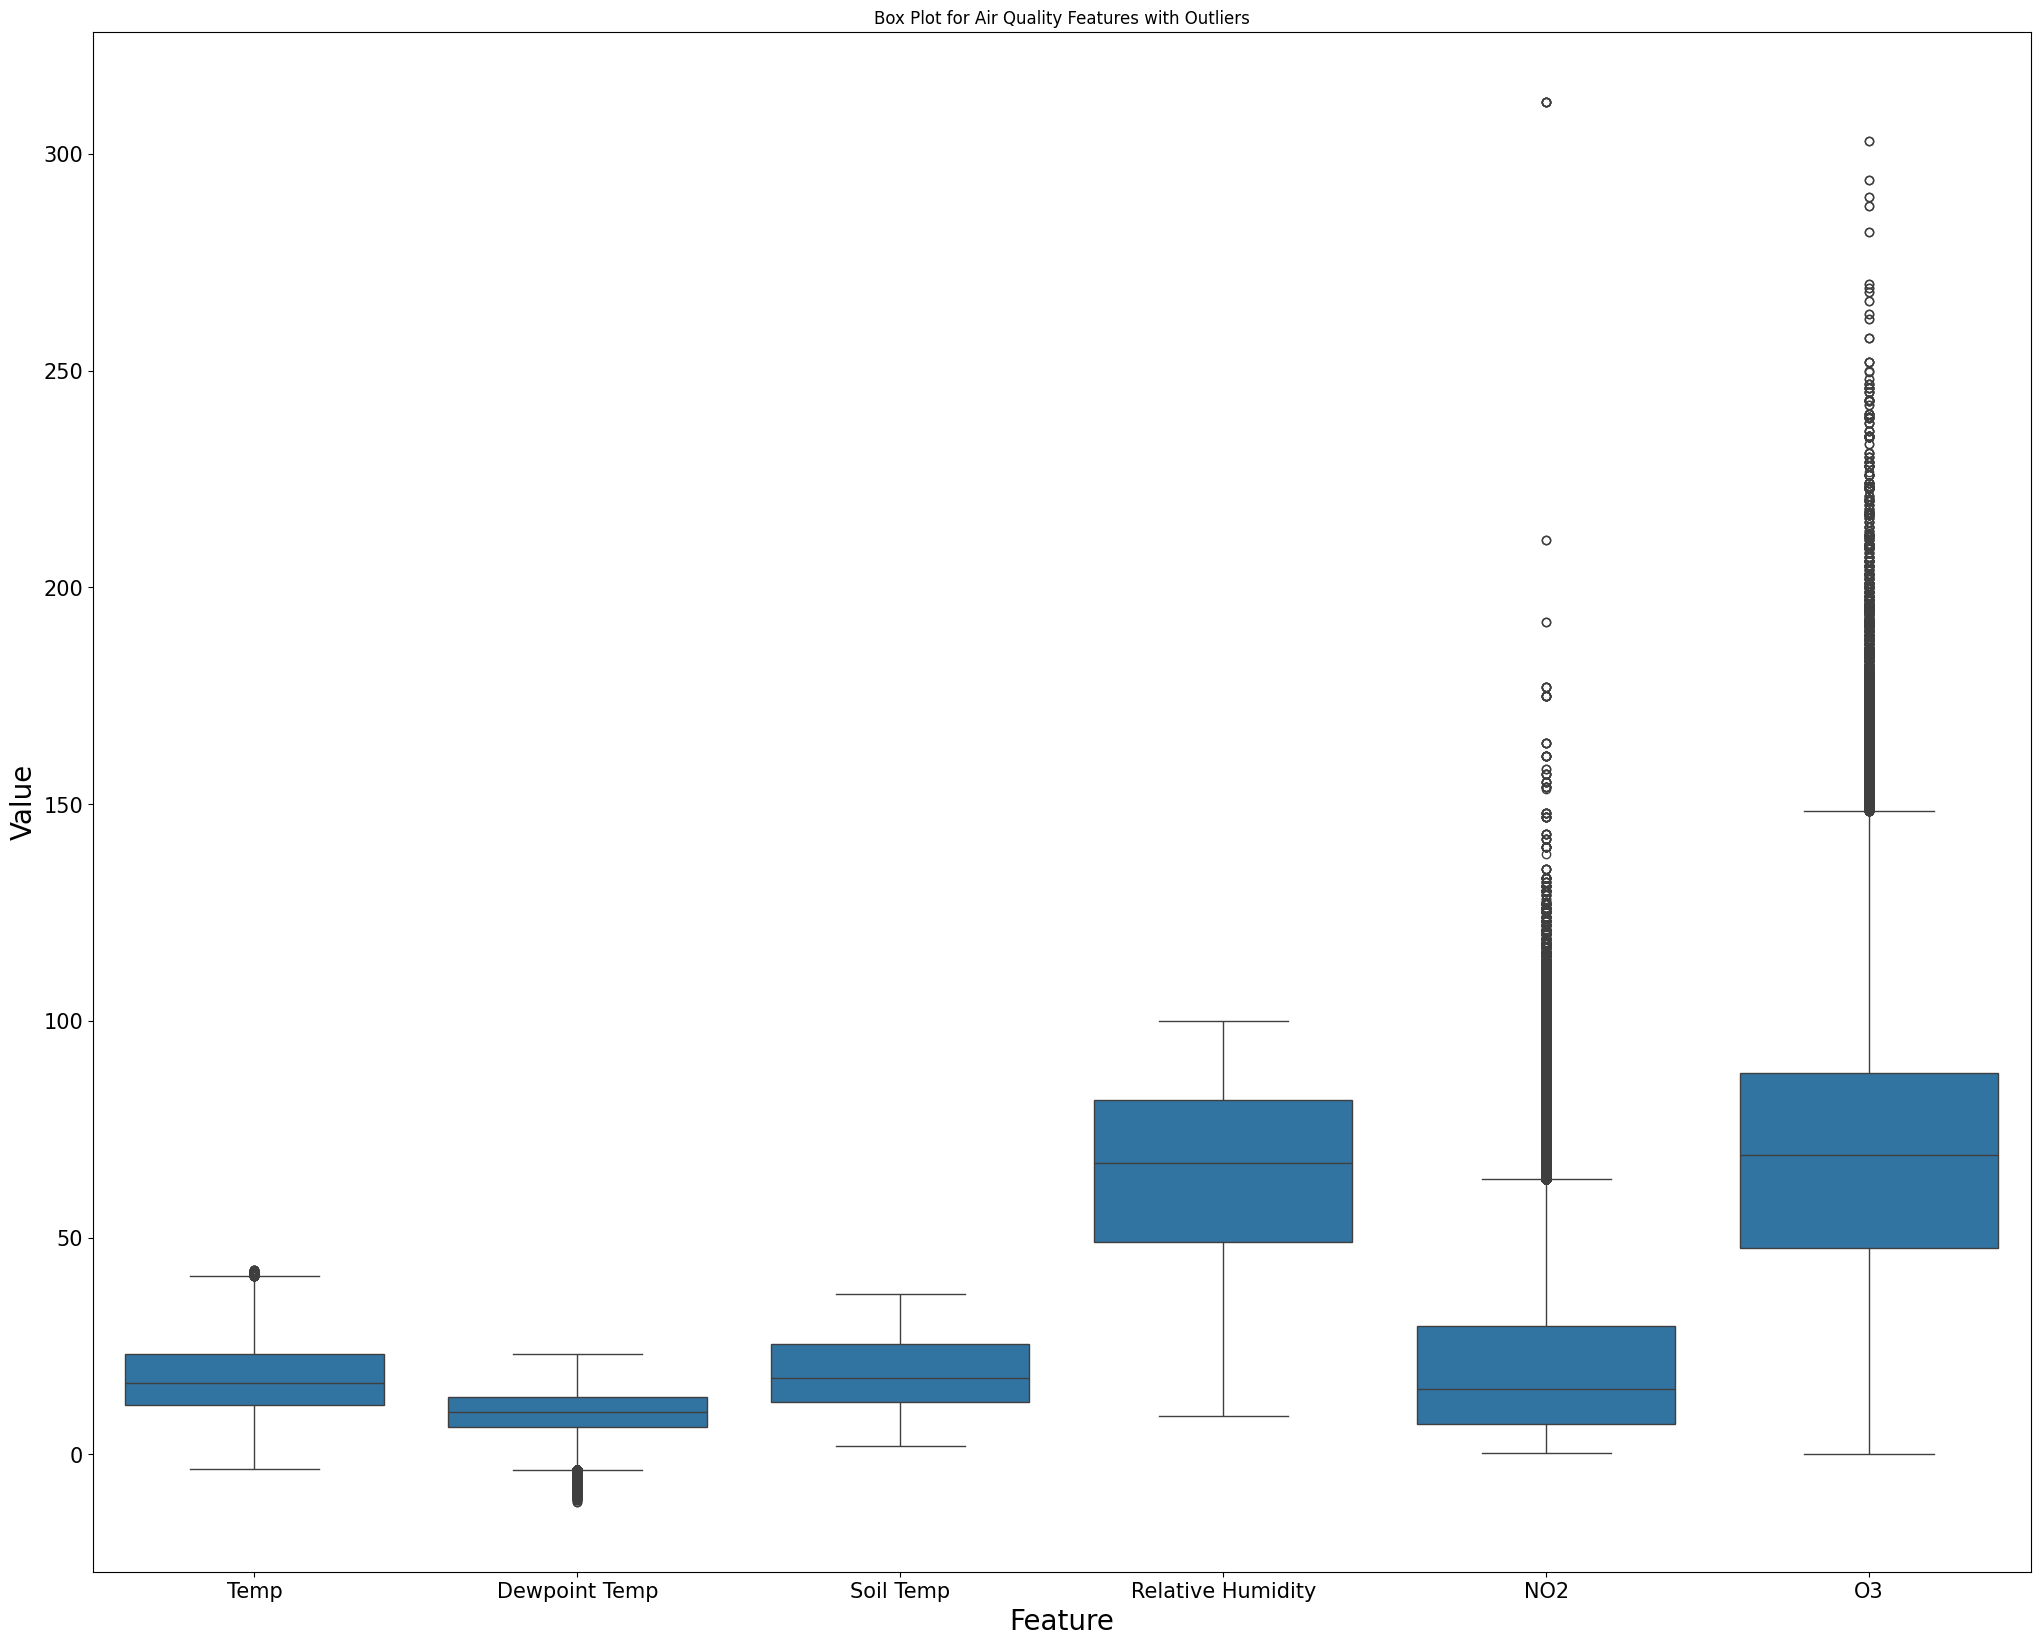

In [21]:
# Melt the DataFrame to long format
df_melted = df2_sorted.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'NO2', 'O3'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

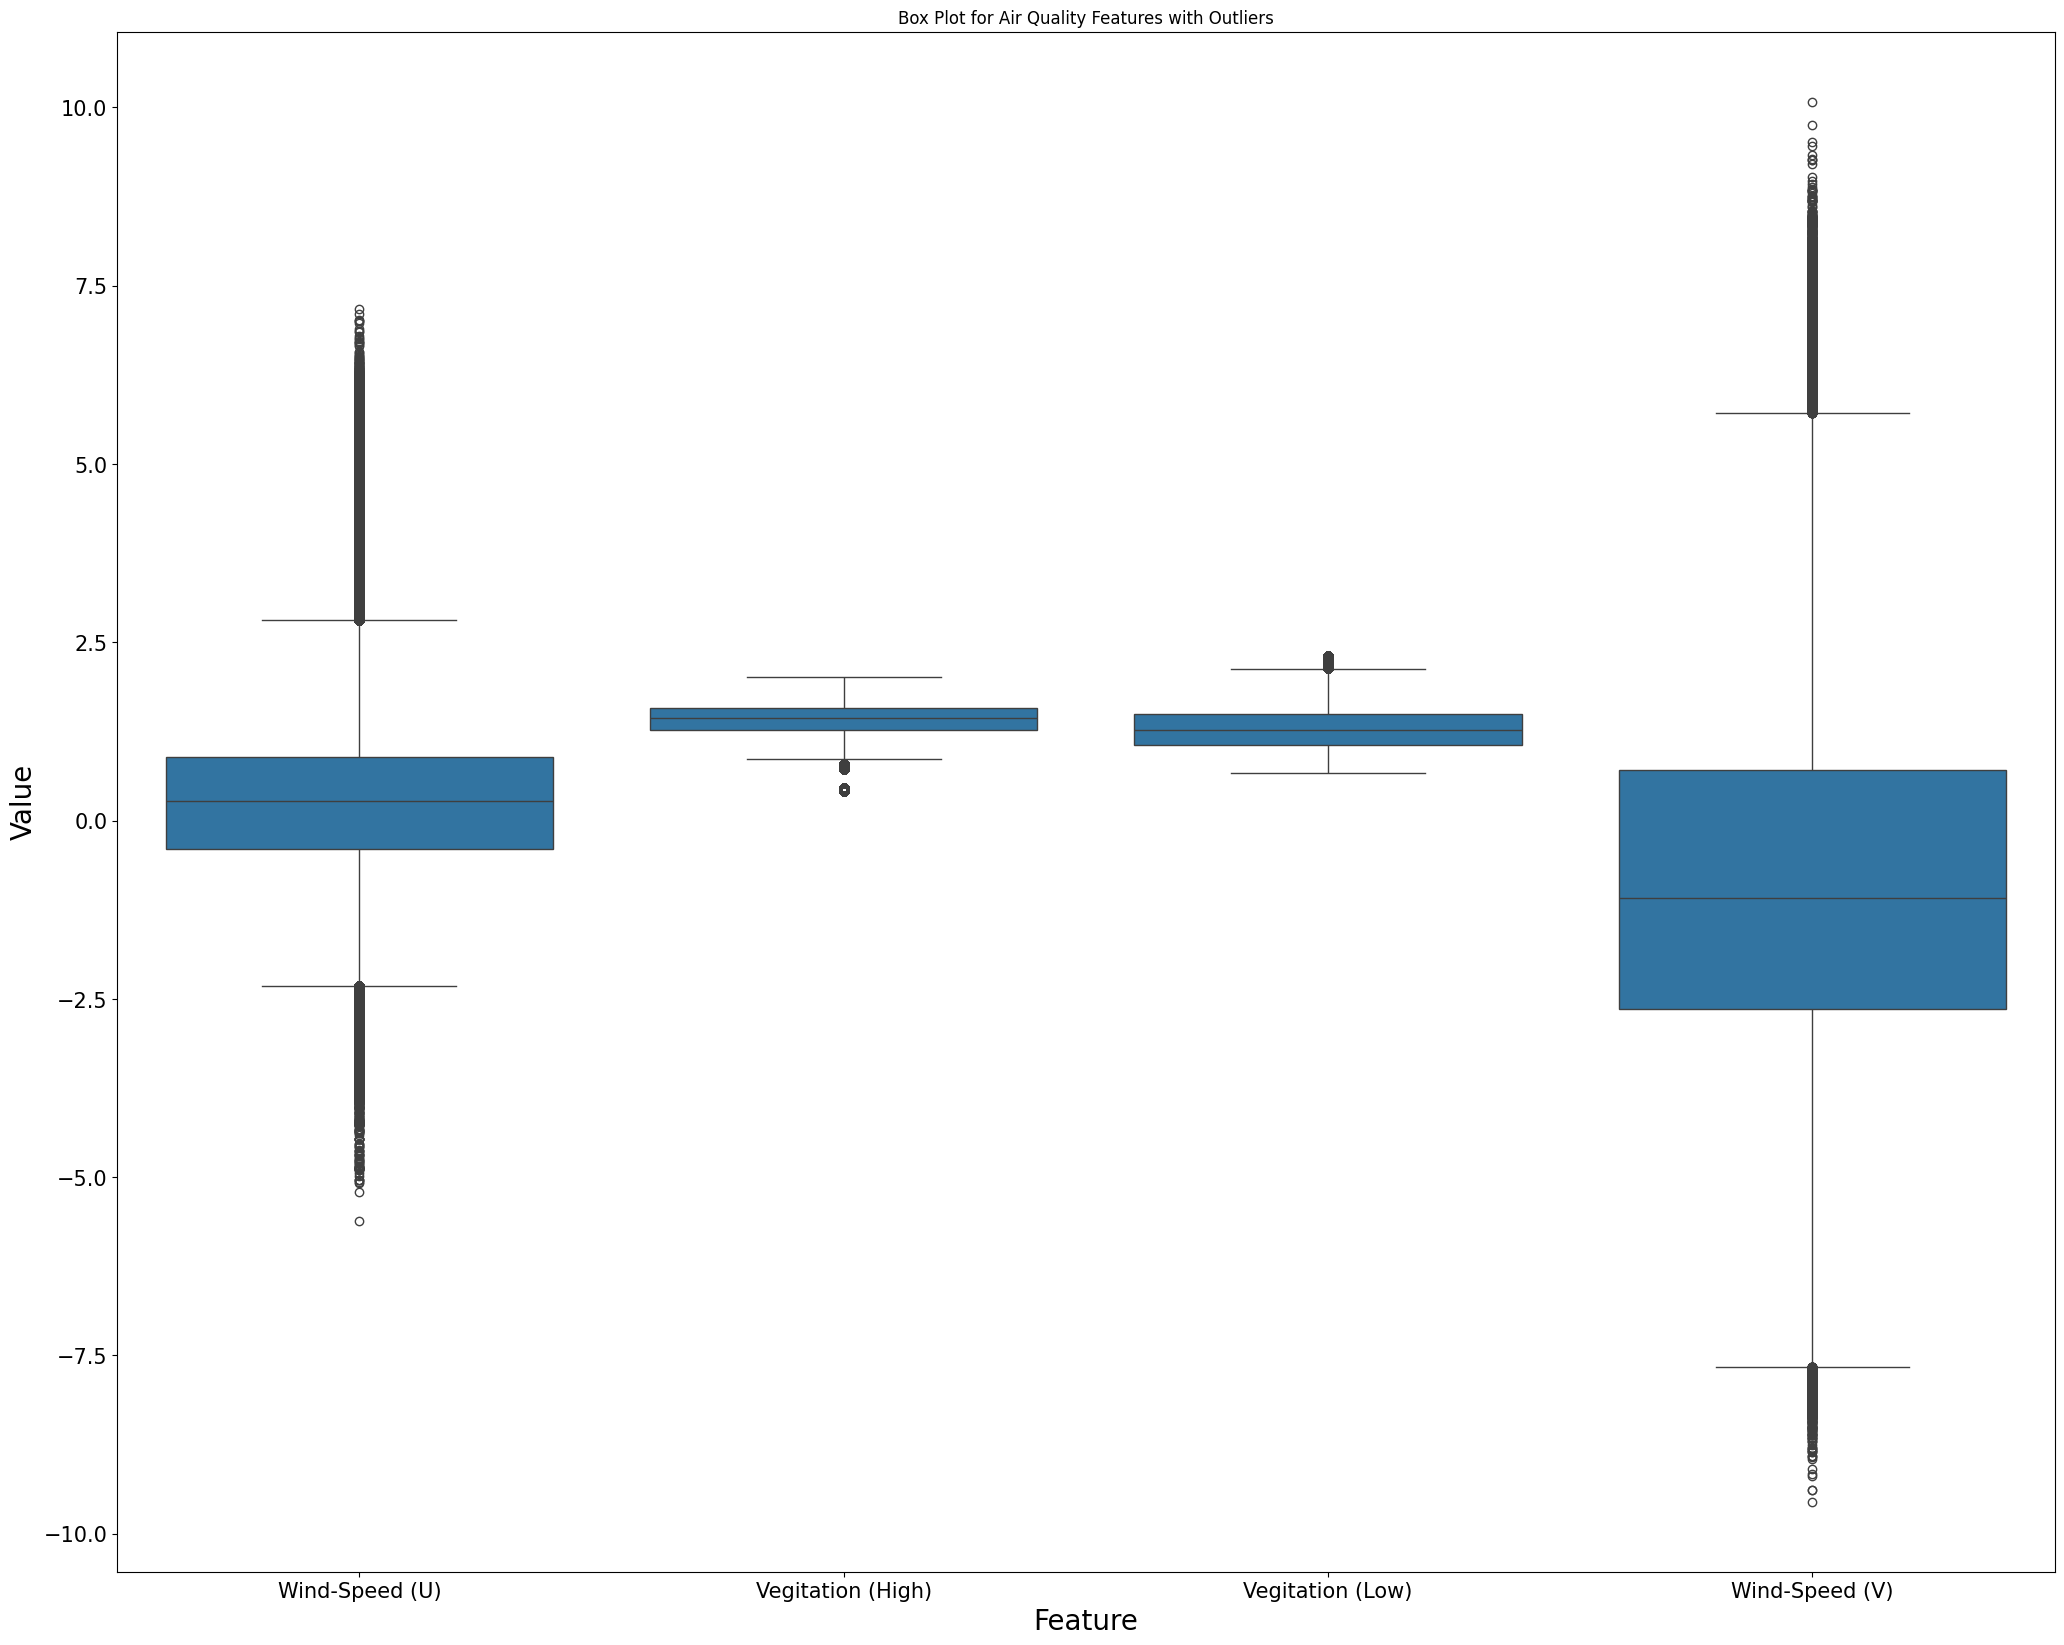

In [22]:
# Melt the DataFrame to long format
df_melted = df2_sorted.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Wind-Speed (U)', 'Vegitation (High)', 'Vegitation (Low)', 'Wind-Speed (V)'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

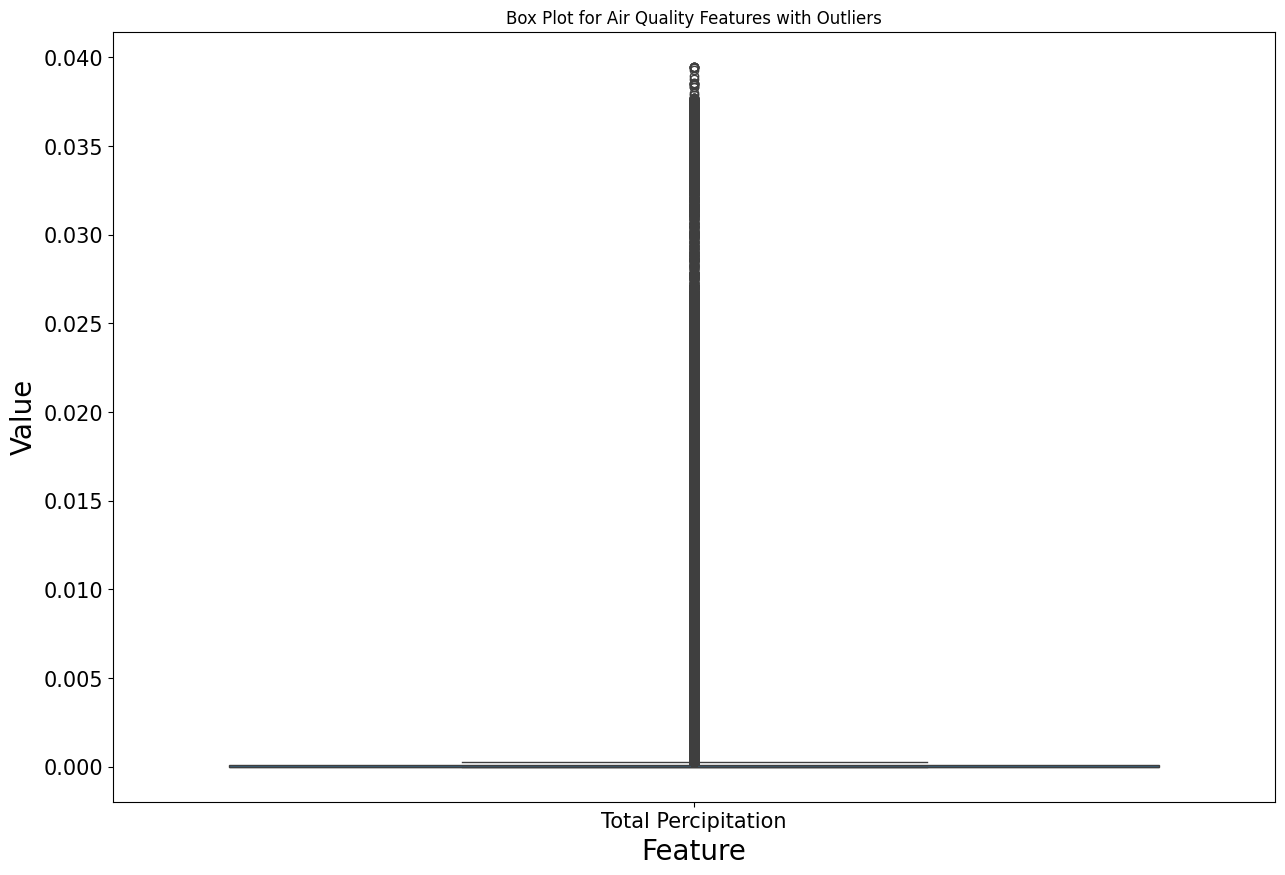

In [23]:

# Melt the DataFrame to long format
df_melted = df2_sorted.melt(value_vars=['Total Percipitation'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [26]:
df = pd.concat([df1_sorted, df2_sorted])

In [27]:
df = df.sort_values(by='Date').reset_index(drop=True)


df

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,17.563843,74.391100,10.520411,7.836725,37.871895,23.755962,PANACEA_022,2.028294,-1.010917,10.344822,18.007863,0.000036,1.777377,1.325480,14.247974,77.553766
1,2020-05-01 00:00:00,46.000000,63.666874,300.000000,9.954234,38.013317,23.647491,PANACEA_014,1.939997,-1.014603,10.894519,18.187878,0.000041,1.581915,1.142319,13.822293,82.583497
2,2020-05-01 00:00:00,46.000000,70.821640,300.000000,10.683514,38.034657,23.702152,PANACEA_019,1.878833,-0.941584,10.571140,18.094453,0.000043,1.072474,1.182858,13.520328,82.431803
3,2020-05-01 00:00:00,12.666270,70.821640,12.985242,10.683514,38.090866,23.725220,PANACEA_020,1.589664,-0.624989,9.433067,16.955154,0.000049,1.642057,2.114149,12.084518,83.921689
4,2020-05-01 00:00:00,14.398063,80.971220,10.162753,7.268141,37.850000,23.650000,Athens CAMS station 8,1.899748,-0.879712,10.287123,17.857515,0.000039,1.721687,1.504277,13.764719,79.671624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144085,2023-10-31 23:00:00,7.692938,56.949203,8.671004,4.834477,43.550000,13.150000,Ancona CAMS Station 5,-0.581816,-0.666097,10.857028,12.766454,0.011380,2.898157,2.685118,12.482900,89.847017
2144086,2023-10-31 23:00:00,11.447794,52.810143,12.015102,7.156701,43.650000,13.550000,Ancona CAMS Station 4,-0.576319,-0.670928,10.853839,12.748055,0.011411,2.903223,2.678106,12.480192,89.844399
2144087,2023-10-31 23:00:00,11.000000,43.742821,15.000000,4.000000,43.527982,13.246672,Jesi,-0.580880,-0.667032,10.855416,12.760298,0.011396,2.897558,2.684010,12.480573,89.851236
2144088,2023-10-31 23:00:00,12.000000,49.000000,16.000000,6.000000,43.633761,13.388042,Falconara Scuola,-0.578379,-0.669105,10.855137,12.755218,0.011399,2.901413,2.680754,12.481370,89.845030


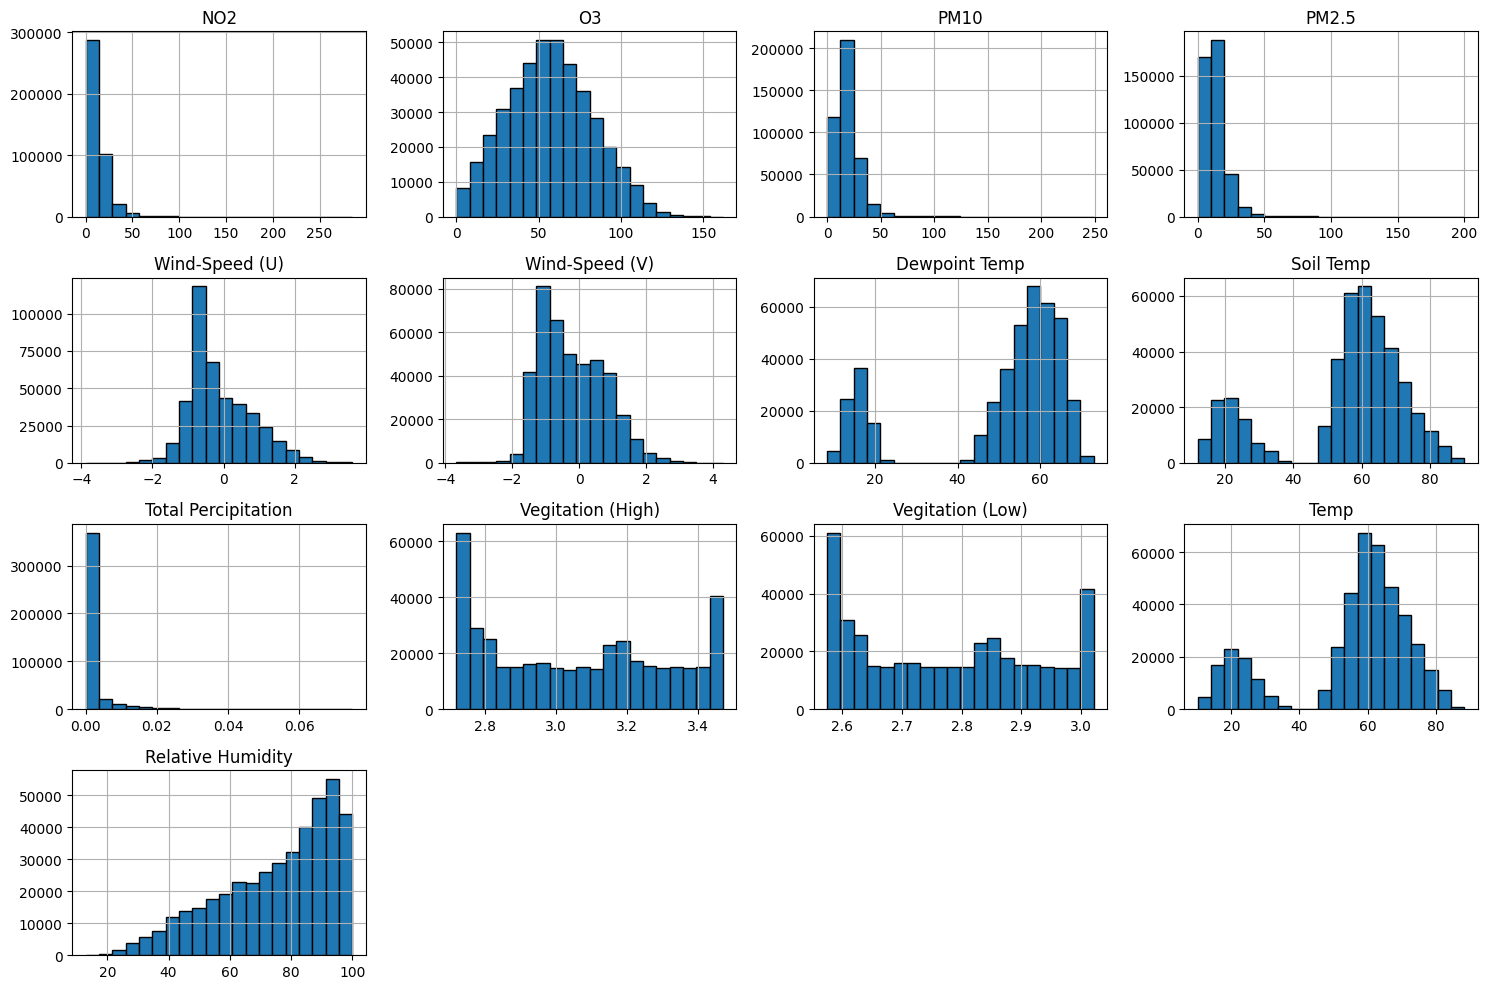

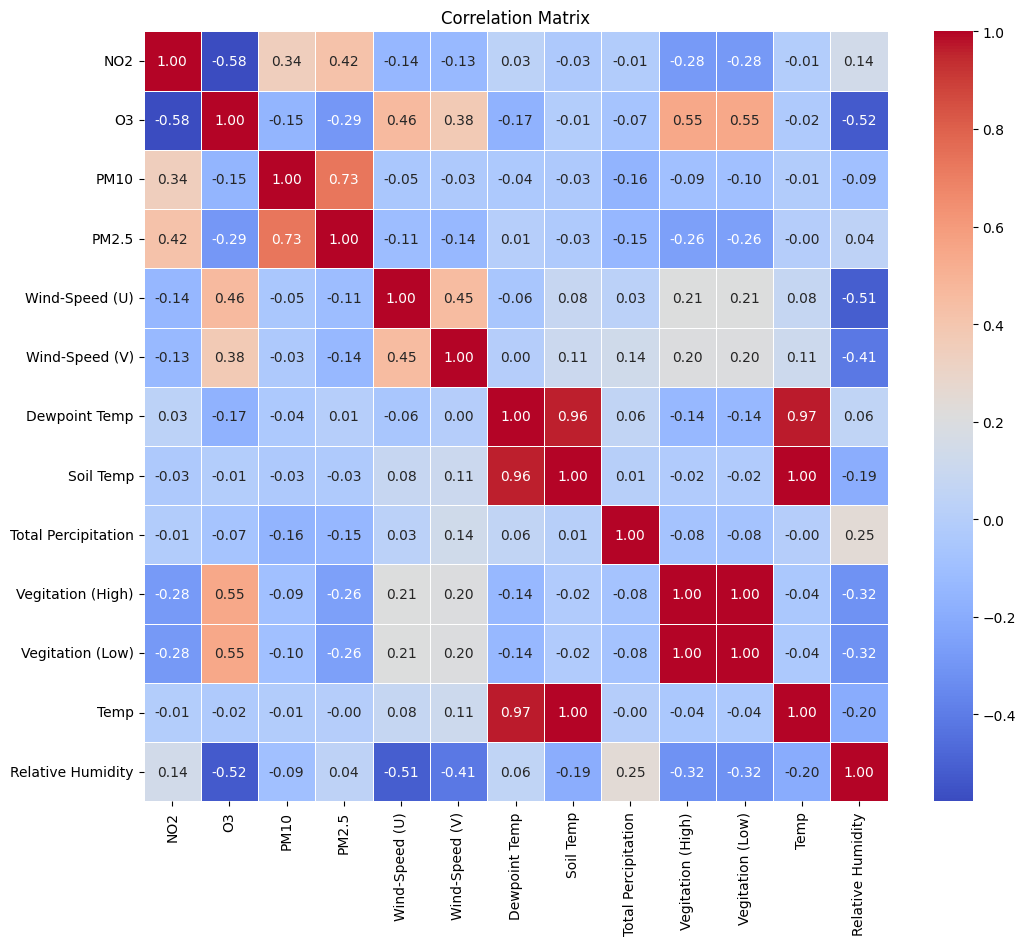

In [28]:
# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df1_sorted[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Generate and plot the correlation matrix

correlation_matrix = df1[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Convert the 'Date' column to datetime
df2_sorted['Date'] = pd.to_datetime(df2_sorted['Date'])

# Set the 'Date' column as the index
df2_sorted.set_index('Date', inplace=True)



In [30]:
df_vis = df2_sorted

# Ensure all numerical columns are converted to numeric types where necessary
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df_vis[numerical_columns] = df_vis[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Resample the data to daily averages for numerical columns only
daily_data = df_vis[numerical_columns].resample('D').mean()



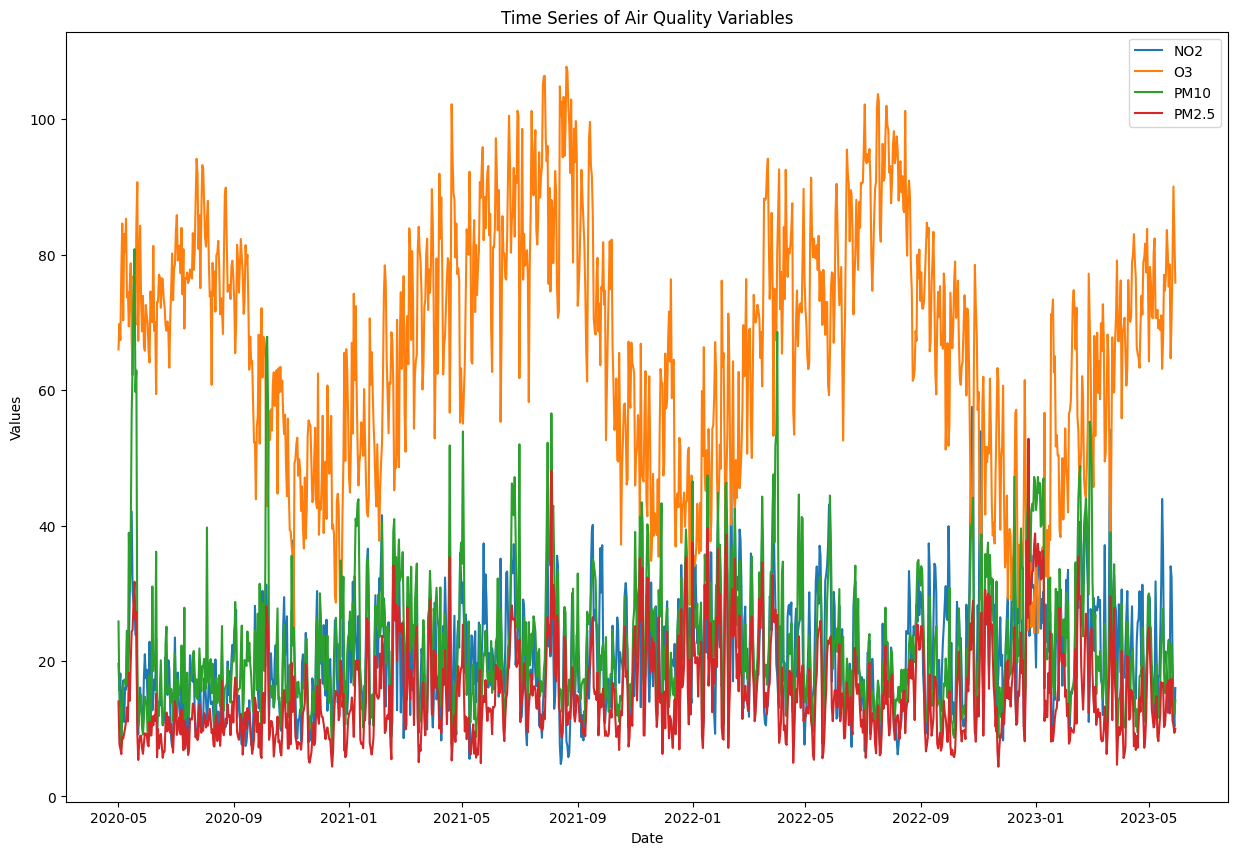

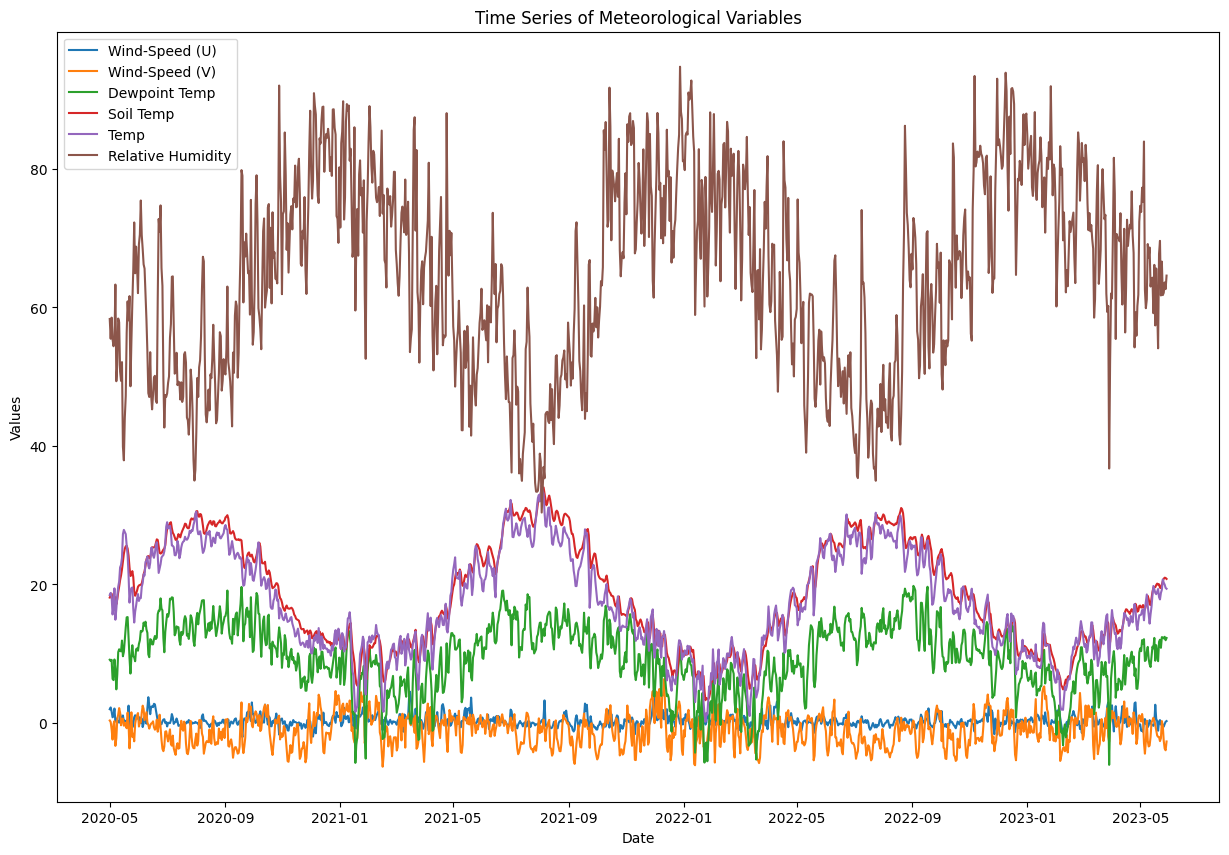

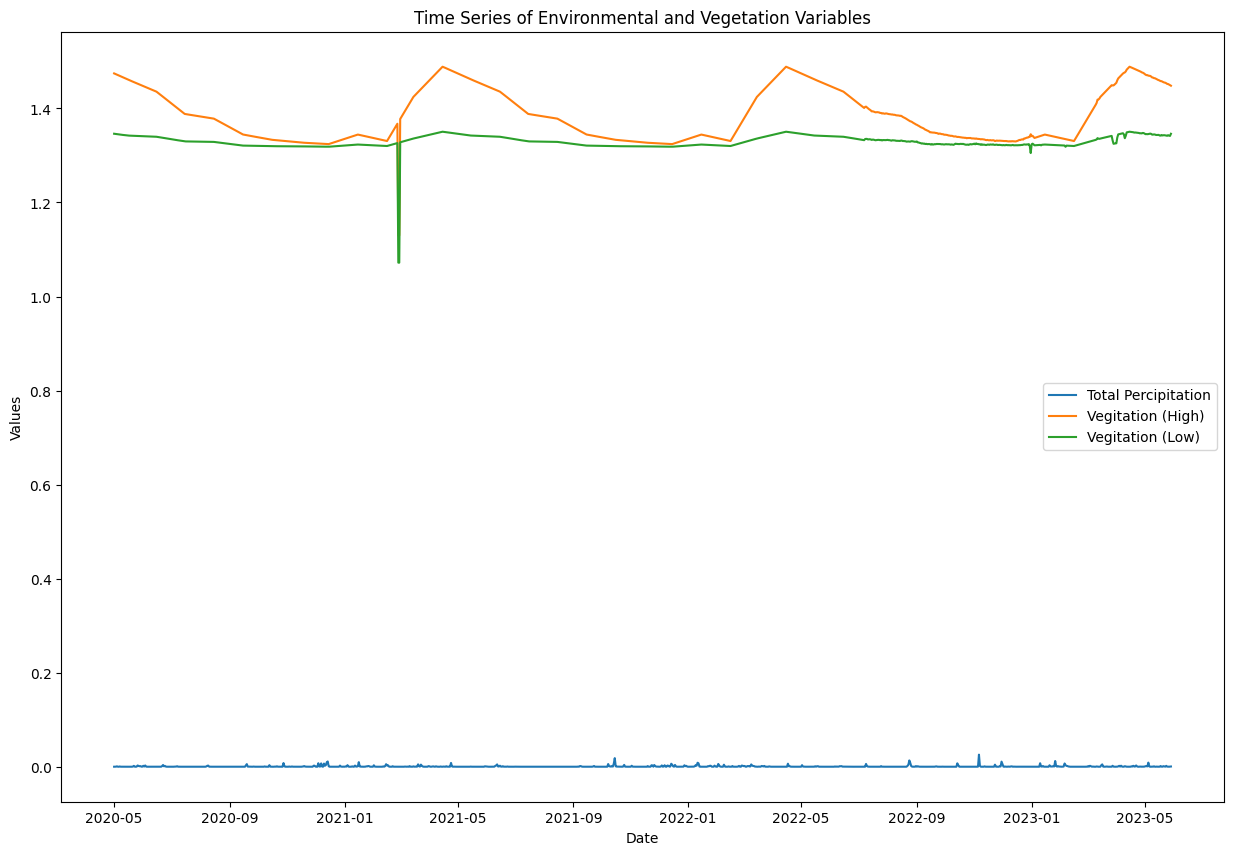

In [31]:
# Plot 1: Time Series Plot for Air Quality Variables
air_quality_vars = ['NO2', 'O3', 'PM10', 'PM2.5']

plt.figure(figsize=(15, 10))
for column in air_quality_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Air Quality Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 2: Time Series Plot for Meteorological Variables
meteorological_vars = ['Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Temp', 'Relative Humidity']

plt.figure(figsize=(15, 10))
for column in meteorological_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Meteorological Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 3: Time Series Plot for Environmental and Vegetation Variables
environmental_vars = ['Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']

plt.figure(figsize=(15, 10))
for column in environmental_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Environmental and Vegetation Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

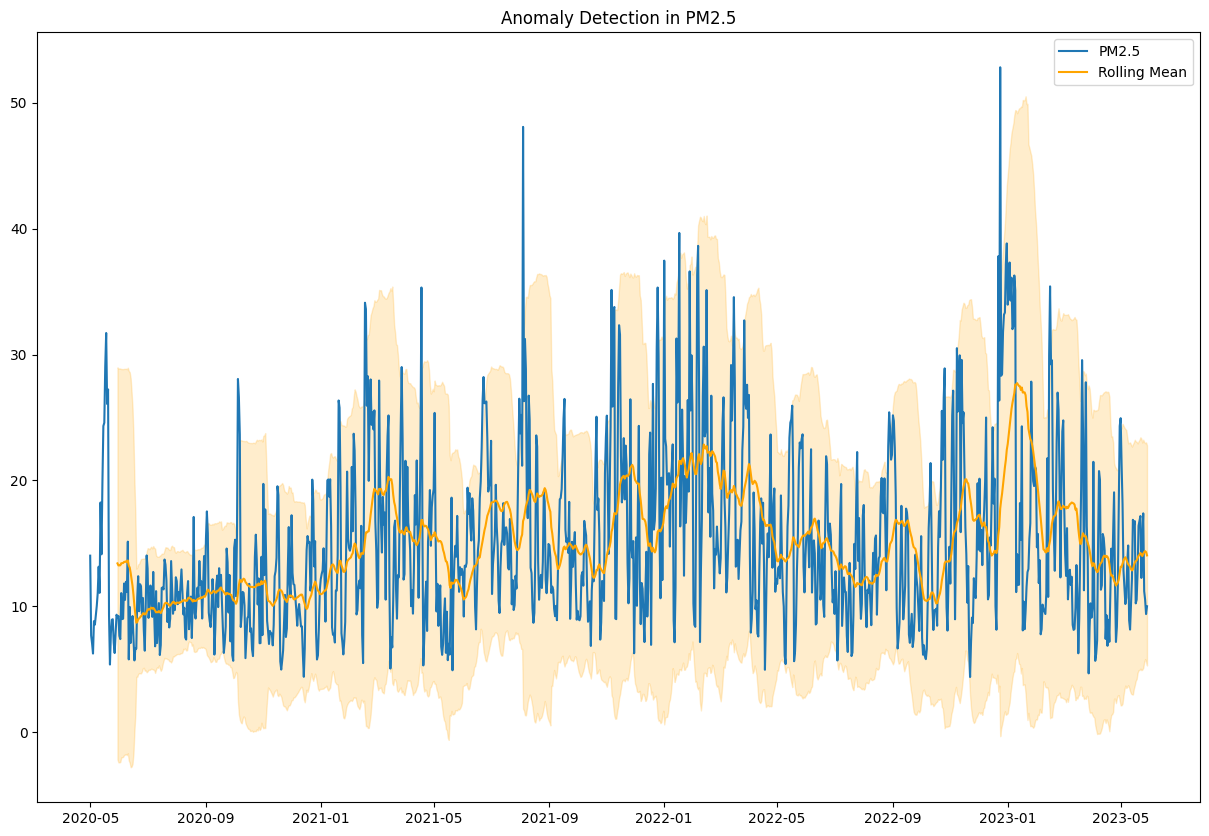

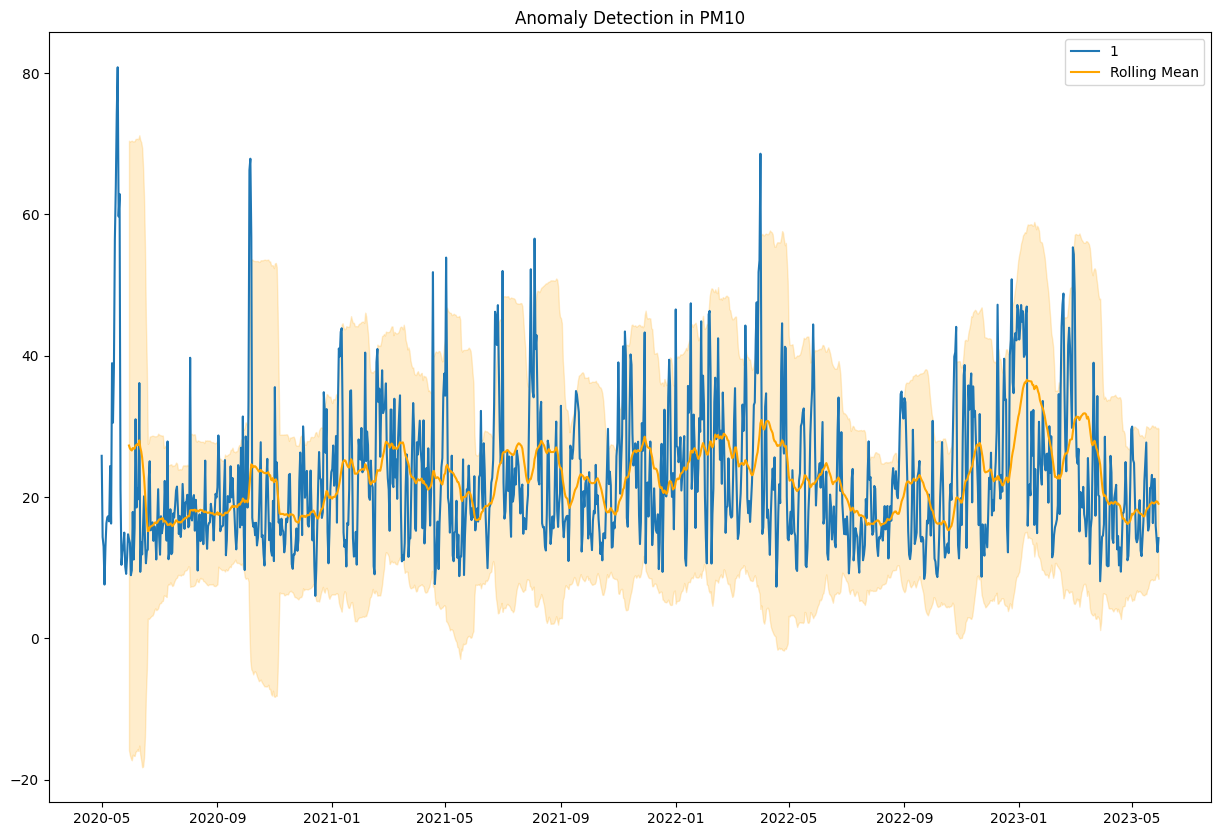

In [32]:
rolling_mean = daily_data.rolling(window=30).mean()
rolling_std = daily_data.rolling(window=30).std()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM2.5'], label='PM2.5')
plt.plot(rolling_mean.index, rolling_mean['PM2.5'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM2.5'] - (2 * rolling_std['PM2.5']), rolling_mean['PM2.5'] + (2 * rolling_std['PM2.5']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM2.5')
plt.show()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM10'], label='1')
plt.plot(rolling_mean.index, rolling_mean['PM10'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM10'] - (2 * rolling_std['PM10']), rolling_mean['PM10'] + (2 * rolling_std['PM10']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM10')
plt.show()

In [33]:
# Define breakpoints for each pollutant
breakpoints = {
    'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
    'O3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150),
           (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)]
}

# Function to calculate sub-index for a given pollutant
def calc_sub_index(concentration, breakpoints):
    for (C_lo, C_hi, I_lo, I_hi) in breakpoints:
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return np.nan

# Function to calculate AQI from pollutant concentrations
def calculate_aqi(row):
    sub_indices = []
    for pollutant in ['PM2.5', 'PM10', 'NO2', 'O3']:
        sub_index = calc_sub_index(row[pollutant], breakpoints[pollutant])
        sub_indices.append(sub_index)
    return max(sub_indices)

# Calculate AQI for each row
df2_sorted['AQI'] = df2_sorted.apply(calculate_aqi, axis=1)

In [34]:
df2_sorted.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI
Date,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896
2020-05-01,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745,52.892704
2020-05-01,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092,189.983140
2020-05-01,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787,189.983140
2020-05-01,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020,43.622113


In [35]:
# Add a new column to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df2_sorted['AQI_Category'] = df2_sorted['AQI'].apply(categorize_aqi)

In [36]:
# Mapping AQI Categories to Numerical Values
aqi_category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4
}

# Adding a new column with numerical AQI values
df2_sorted['AQI_Numerical'] = df2_sorted['AQI_Category'].map(aqi_category_mapping)

In [37]:
df2_sorted.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
Date,,,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
2020-05-01,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745,52.892704,Moderate,2
2020-05-01,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092,189.983140,Very Unhealthy,4
2020-05-01,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787,189.983140,Very Unhealthy,4
2020-05-01,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020,43.622113,Good,1


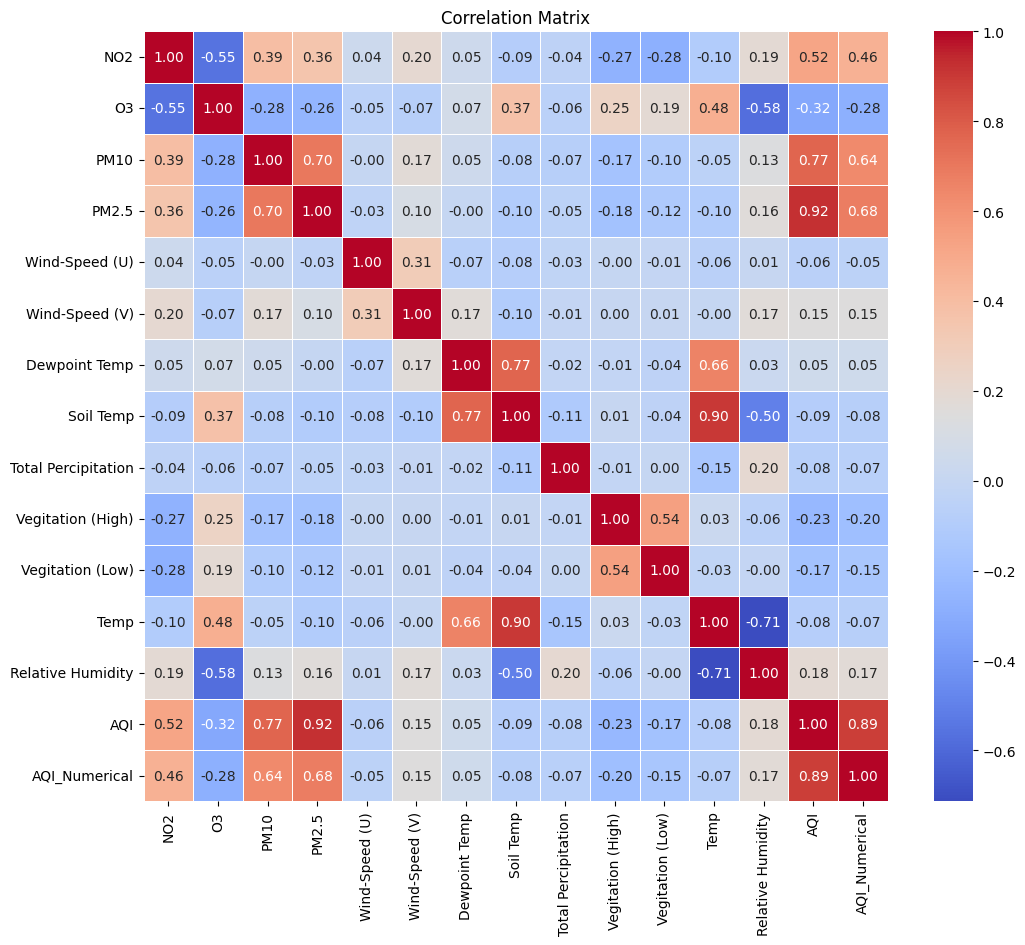

In [38]:
# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity','AQI', 'AQI_Numerical']


# Generate and plot the correlation matrix
correlation_matrix = df2_sorted[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [42]:
df2_sorted.to_csv('/content/aqi_cleaned.csv')

##IMPORTING

In [43]:
import pandas as pd
data = pd.read_csv('/content/aqi_cleaned.csv')

In [44]:
data

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
1,2020-05-01 00:00:00,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745,52.892704,Moderate,2
2,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092,189.983140,Very Unhealthy,4
3,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787,189.983140,Very Unhealthy,4
4,2020-05-01 00:00:00,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020,43.622113,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726459,2023-05-29 23:00:00,23.592476,62.913223,17.866667,16.113333,37.97381,23.719069,CleanAir in Greece - Thiseio II,0.206695,-1.264044,13.834846,21.819895,0.000790,0.991183,0.993116,17.333390,79.936127,59.440057,Moderate,2
1726460,2023-05-29 23:00:00,24.308407,61.684834,18.143023,10.256213,37.85000,23.750000,Athens CAMS station 9,0.214275,-1.238656,13.404108,20.834574,0.000768,1.713203,1.426653,16.982458,79.511505,42.734221,Good,1
1726461,2023-05-29 23:00:00,29.450640,68.105500,17.861193,11.609172,37.85000,23.650000,Athens CAMS station 8,0.250205,-1.204437,13.413361,20.768693,0.000812,1.691557,1.499634,16.883444,80.055674,48.371550,Good,1
1726462,2023-05-29 23:00:00,20.510029,52.980500,18.360280,11.352183,37.95000,23.950000,Athens CAMS station 6,0.201650,-1.244336,13.349600,20.728498,0.000849,1.711001,1.765690,17.005146,79.107080,47.300763,Good,1


In [45]:
data.isnull().sum()

,0
Date,0
NO2,0
O3,0
PM10,0
PM2.5,0
Latitude,0
Longitude,0
station_name,0
Wind-Speed (U),0
Wind-Speed (V),0


In [46]:
data_sorted = data.sort_values(by='Date', ascending=True)
display(data_sorted)


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
34,2020-05-01 00:00:00,12.666270,70.821640,12.985242,10.683514,38.04972,23.757725,ATH-ENVICARE-2,1.747032,-0.766625,9.860752,17.523380,0.000046,1.487879,1.435056,13.187152,80.387345,44.514642,Good,1
35,2020-05-01 00:00:00,2.892315,74.565690,8.587352,6.306404,38.15000,23.650000,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
36,2020-05-01 00:00:00,17.196804,67.904120,10.917974,8.207660,37.85000,23.850000,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
37,2020-05-01 00:00:00,15.817172,67.634710,11.353168,8.217451,37.85000,23.950000,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726426,2023-05-29 23:00:00,24.000000,62.000000,19.000000,20.736000,37.93200,23.713000,SMYRNI,0.240230,-1.216293,13.464139,20.926649,0.000809,1.557783,1.392521,16.946201,79.994187,69.161545,Moderate,2
1726427,2023-05-29 23:00:00,15.000000,58.000000,22.000000,12.737628,37.90100,23.879000,KOROPI,0.075186,-1.339309,13.110978,21.116500,0.000581,1.663799,2.290440,17.310772,76.371899,52.340934,Moderate,2
1726428,2023-05-29 23:00:00,43.381477,34.536785,20.490770,13.595480,37.95000,23.750000,Athens CAMS station 4,0.205975,-1.253092,13.531719,21.097203,0.000785,1.511300,1.201880,17.086349,79.632300,54.145001,Moderate,2
1726430,2023-05-29 23:00:00,23.520477,52.692590,20.786015,12.737628,37.95000,23.850000,Athens CAMS station 5,0.181920,-1.268006,13.425368,20.876583,0.000797,1.691843,1.445181,17.087825,79.080804,52.340934,Moderate,2


###BUILDING THE MODEL

####FITTING AND FORECASTING

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 13.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

RMSE: 19.833257979757096
MSE: 393.35812209159855
MAE: 15.430511805525041


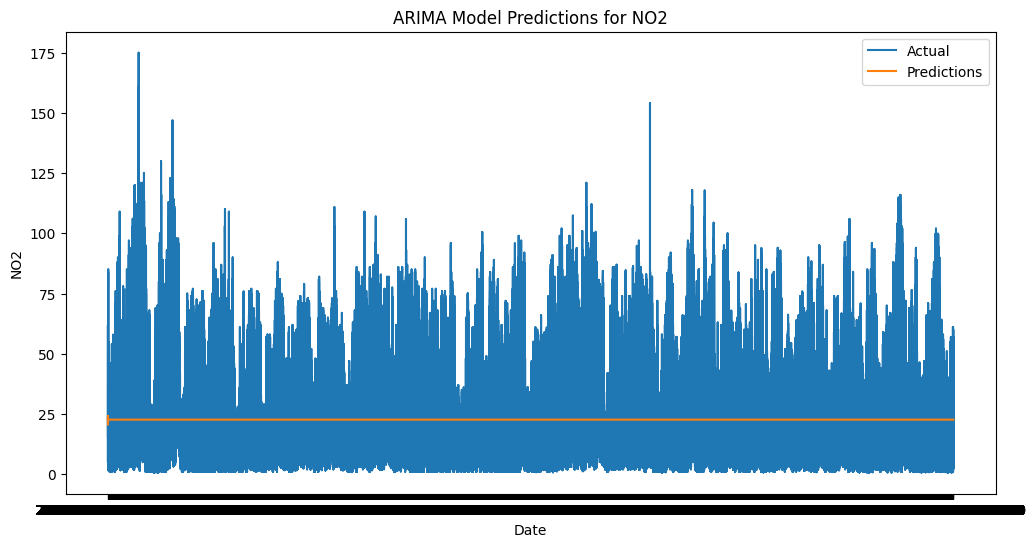

In [47]:
!pip install statsmodels
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Splitting dataset into training and testing sets (80:20) split
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extracting NO2 column from the training set
train_no2 = train_data['NO2']

# Fitting the ARIMA model
model = ARIMA(train_no2, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_no2), end=len(data_sorted)-1)

# Evaluating the model
org_NO2_rmse = mean_squared_error(test_data['NO2'], predictions, squared=False)
org_NO2_mse = mean_squared_error(test_data['NO2'], predictions)
org_NO2_mae= mean_absolute_error(test_data['NO2'], predictions)

print('RMSE:', org_NO2_rmse)
print('MSE:', org_NO2_mse)
print('MAE:', org_NO2_mae)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['NO2'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for NO2')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.legend()
plt.show()


In [48]:
print("Predicted values:\n", predictions[:5])
print("Actual values:", test_data['NO2'].values[:5])

Predicted values:
 1381171    20.658394
1381172    22.807305
1381173    21.091452
1381174    21.891246
1381175    22.512437
Name: predicted_mean, dtype: float64
Actual values: [15.65082   23.4659375 15.65082   62.        15.65082  ]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

RMSE: 25.71213633958834


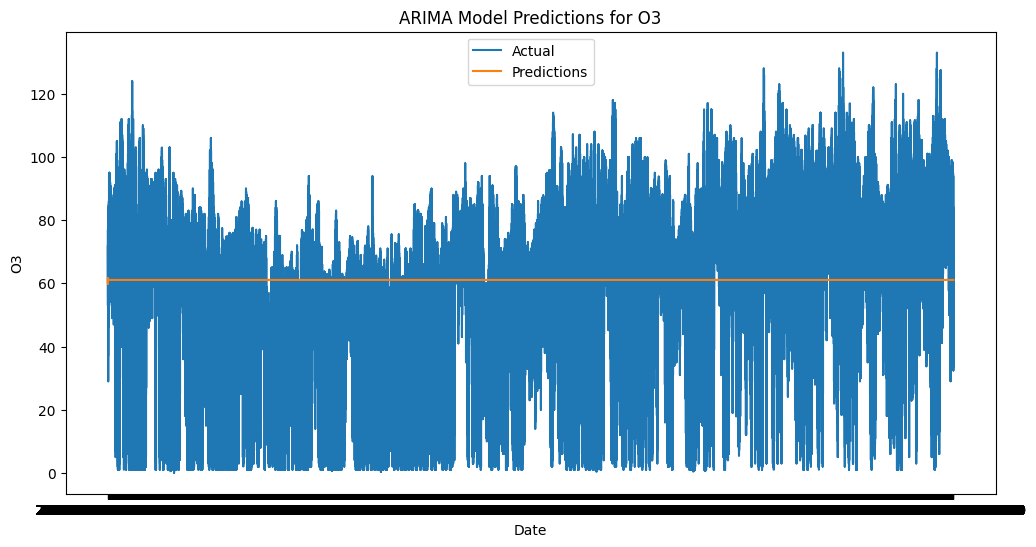

In [49]:
# Extracting the O3 column from the training set
train_o3 = train_data['O3']

# Fitting the ARIMA model

model = ARIMA(train_o3, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_o3), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['O3'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['O3'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for O3')
plt.xlabel('Date')
plt.ylabel('O3')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

RMSE: 22.377749899026075


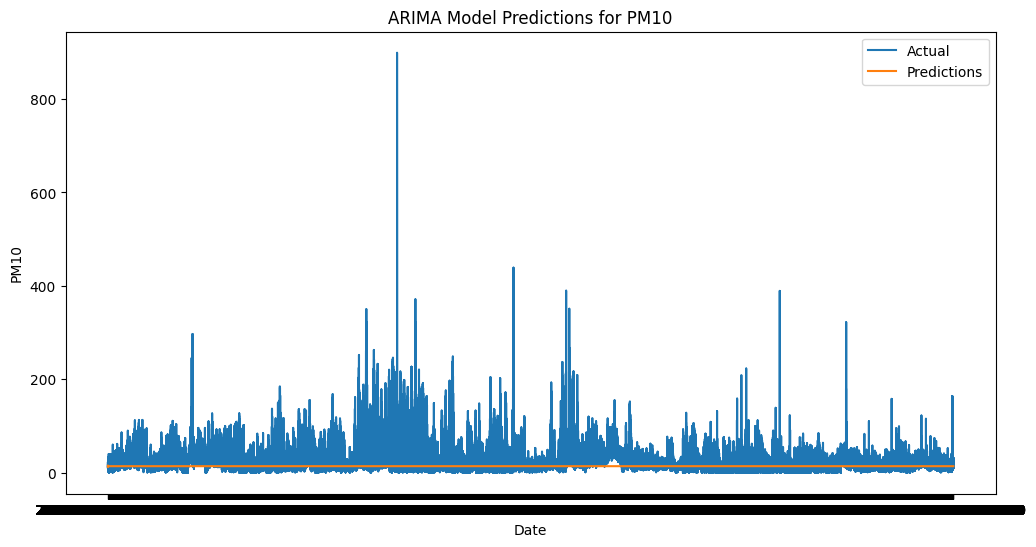

In [50]:
# Extracting the PM10 column from the training set
train_pm10 = train_data['PM10']

# Fitting the ARIMA model

model = ARIMA(train_pm10, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm10), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['PM10'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM10'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM10')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

RMSE: 21.855988050978464


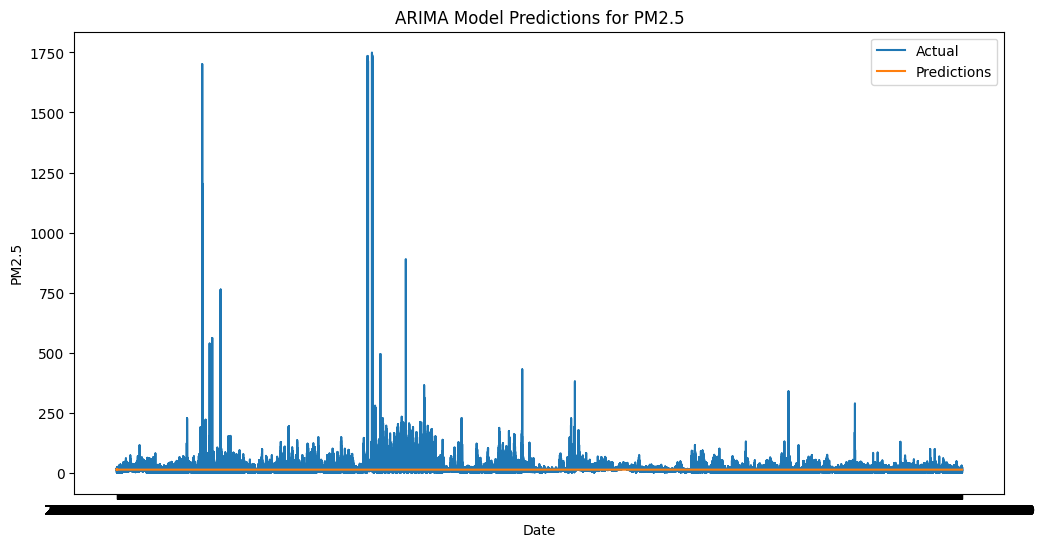

In [51]:
# Extracting the PM2.5 column from the training set
train_pm25 = train_data['PM2.5']

# Fitting the ARIMA model
model = ARIMA(train_pm25, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm25), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['PM2.5'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM2.5'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()


In [52]:
print("Predicted values:", predictions[:5])
print("Actual values:", test_data['PM2.5'].values[:5])


Predicted values: 1381171    13.118607
1381172    14.299150
1381173    12.978926
1381174    12.440288
1381175    12.549912
Name: predicted_mean, dtype: float64
Actual values: [11.713204 10.8875   11.713204 12.25625  10.8875  ]


###FORECASTING

In [53]:
import pandas as pd
data1 = pd.read_csv("/content/aqi_cleaned.csv")


In [54]:
# Converting the 'Date' column to datetime and setting it as index
data1['Date'] = pd.to_datetime(data1['Date']) # Convert 'Date' column to datetime
data1.set_index('Date', inplace=True) #Setting Date columnn as index

# Resample data to daily average (if data is in hourly format)
no2_data = data1['NO2'].resample('D').mean()

# Fiting the ARIMA model to NO2 pollutant
arima_model = ARIMA(no2_data, order=(5,1,0))
arima_result = arima_model.fit()

# Forecasting future values for next 60 days
forecast_steps = 60
forecast = arima_result.forecast(steps=forecast_steps)

forecast.head()

,predicted_mean
2023-05-30,20.543650
2023-05-31,21.588079
2023-06-01,19.994893
2023-06-02,17.936057
2023-06-03,16.907595


In [55]:
o3_data = data1['O3'].resample('D').mean()


arima_model_o3 = ARIMA(o3_data, order=(5,1,0))
arima_result_o3 = arima_model_o3.fit()


forecast_o3_steps = 60  # Forecasting for the next 60 days
forecast_o3 = arima_result_o3.forecast(steps=forecast_o3_steps)

forecast_o3.head(30)

,predicted_mean
2023-05-30,75.320482
2023-05-31,75.985045
2023-06-01,77.195551
2023-06-02,78.984081
2023-06-03,79.046628
2023-06-04,78.196395
2023-06-05,77.731966
2023-06-06,77.623910
2023-06-07,77.720355
2023-06-08,77.965096


In [56]:
pm25_data = data1['PM2.5'].resample('D').mean()

# Fitting the ARIMA model for PM2.5 pollutant
arima_model_pm25 = ARIMA(pm25_data, order=(5,1,0))
arima_result_pm25 = arima_model_pm25.fit()

forecast_pm25_steps = 60  # Forecasting for the next 60 days
forecast_pm25 = arima_result_pm25.forecast(steps=forecast_pm25_steps)

forecast_pm25.head()

,predicted_mean
2023-05-30,11.368935
2023-05-31,12.017004
2023-06-01,11.765742
2023-06-02,11.394826
2023-06-03,11.037790


In [57]:
pm10_data = data1['PM10'].resample('D').mean()

# Fitting the ARIMA model for PM10 pollutant
arima_model_pm10 = ARIMA(pm10_data, order=(5,1,0))
arima_result_pm10 = arima_model_pm10.fit()

# Forecastiung future values for PM10 pollutant for the next 60 days
forecast_pm10_steps = 60
forecast_pm10 = arima_result_pm10.forecast(steps=forecast_pm10_steps)

forecast_pm10.head()

,predicted_mean
2023-05-30,15.745859
2023-05-31,16.258665
2023-06-01,15.959058
2023-06-02,15.456427
2023-06-03,15.079699


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


no2_predictions = arima_result.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculating MAE, MSE, and RMSE for NO2 pollutant
mae_no2 = mean_absolute_error(no2_data, no2_predictions)
mse_no2 = mean_squared_error(no2_data, no2_predictions)
rmse_no2 = np.sqrt(mse_no2)

(mae_no2, mse_no2, rmse_no2)


(5.283387664464823, 45.81223185280995, 6.768473376826561)

In [59]:
# Generating in-sample predictions for O3 pollutant
o3_predictions = arima_result_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])

# Calculating MAE, MSE, and RMSE for O3 pollutant
mae_o3 = mean_absolute_error(o3_data, o3_predictions)
mse_o3 = mean_squared_error(o3_data, o3_predictions)
rmse_o3 = np.sqrt(mse_o3)

pm25_predictions = arima_result_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])

mae_pm25 = mean_absolute_error(pm25_data, pm25_predictions)
mse_pm25 = mean_squared_error(pm25_data, pm25_predictions)
rmse_pm25 = np.sqrt(mse_pm25)

pm10_predictions = arima_result_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])

mae_pm10 = mean_absolute_error(pm10_data, pm10_predictions)
mse_pm10 = mean_squared_error(pm10_data, pm10_predictions)
rmse_pm10 = np.sqrt(mse_pm10)

(mae_o3, mse_o3, rmse_o3), (mae_pm25, mse_pm25, rmse_pm25), (mae_pm10, mse_pm10, rmse_pm10)


((6.644324388131283, 76.46006242808701, 8.74414446518852),
 (3.6299000462235163, 25.31279104619268, 5.031181873694558),
 (5.36002116179779, 55.19745391318858, 7.429498900544274))

###OPTIMISING THE MODEL

In [60]:
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

def optimize_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(data, order=(p, d, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, d, q)
                best_model = model
        except:
            continue
    return best_order, best_model

# Define the range of parameters
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)




In [61]:
# Optimizzing ARIMA parameters for NO2 pollutant
best_order_no2, best_model_no2 = optimize_arima(no2_data, p_values, d_values, q_values)

best_order_no2, best_model_no2.aic

# Fitting the ARIMA model with the optimal parameters for NO2 pollutant
optimized_arima_model_no2 = ARIMA(no2_data, order=best_order_no2).fit()

# Generating in-sample predictions for NO2 using the optimized model
optimized_no2_predictions = optimized_arima_model_no2.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculatiung MAE, MSE, and RMSE for the optimized NO2 model
optimized_mae_no2 = mean_absolute_error(no2_data, optimized_no2_predictions)
optimized_mse_no2 = mean_squared_error(no2_data, optimized_no2_predictions)
optimized_rmse_no2 = np.sqrt(optimized_mse_no2)

optimized_mae_no2, optimized_mse_no2, optimized_rmse_no2


(5.084096685552345, 41.24789275176025, 6.422452238184434)

In [62]:

best_order_o3, best_model_o3 = optimize_arima(o3_data, p_values, d_values, q_values)

optimized_arima_model_o3 = ARIMA(o3_data, order=best_order_o3).fit()


optimized_o3_predictions = optimized_arima_model_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])


optimized_mae_o3 = mean_absolute_error(o3_data, optimized_o3_predictions)
optimized_mse_o3 = mean_squared_error(o3_data, optimized_o3_predictions)
optimized_rmse_o3 = np.sqrt(optimized_mse_o3)

best_order_o3, optimized_mae_o3, optimized_mse_o3, optimized_rmse_o3


((4, 1, 4), 6.439898811376183, 72.09338713345603, 8.49078248063487)

In [63]:
# Optimizing ARIMA parameters for PM2.5
best_order_pm25, best_model_pm25 = optimize_arima(pm25_data, p_values, d_values, q_values)

# Fitting the ARIMA model with the optimal parameters for PM2.5
optimized_arima_model_pm25 = ARIMA(pm25_data, order=best_order_pm25).fit()

# Generating in-sample predictions for PM2.5 using the optimized model
optimized_pm25_predictions = optimized_arima_model_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])

# Calculating MAE, MSE, and RMSE for the optimized PM2.5 model
optimized_mae_pm25 = mean_absolute_error(pm25_data, optimized_pm25_predictions)
optimized_mse_pm25 = mean_squared_error(pm25_data, optimized_pm25_predictions)
optimized_rmse_pm25 = np.sqrt(optimized_mse_pm25)

best_order_pm25, optimized_mae_pm25, optimized_mse_pm25, optimized_rmse_pm25


((5, 1, 5), 3.5296691110283196, 23.51827294845104, 4.849564201910419)

In [64]:
best_order_pm10, best_model_pm10 = optimize_arima(pm10_data, p_values, d_values, q_values)

optimized_arima_model_pm10 = ARIMA(pm10_data, order=best_order_pm10).fit()


optimized_pm10_predictions = optimized_arima_model_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])


optimized_mae_pm10 = mean_absolute_error(pm10_data, optimized_pm10_predictions)
optimized_mse_pm10 = mean_squared_error(pm10_data, optimized_pm10_predictions)
optimized_rmse_pm10 = np.sqrt(optimized_mse_pm10)

best_order_pm10, optimized_mae_pm10, optimized_mse_pm10, optimized_rmse_pm10


((4, 0, 3), 5.1714803709647565, 50.022380000925075, 7.072650139864482)

###DISPLAYING THE COMPARISION BETWEEN ORIGINAL AND OPTIMIZED MODEL'S ERRORS

###FORCASTED DATA

In [65]:
# Forecasting future values for NO2 using the optimized model
forecast_no2_optimized = best_model_no2.forecast(steps=60)


forecast_o3_optimized = best_model_o3.forecast(steps=60)


forecast_pm25_optimized = best_model_pm25.forecast(steps=60)


forecast_pm10_optimized = best_model_pm10.forecast(steps=60)

forecast_no2_optimized.head(), forecast_o3_optimized.head(), forecast_pm25_optimized.head(), forecast_pm10_optimized.head()


(2023-05-30    20.663499
 2023-05-31    22.613832
 2023-06-01    22.945190
 2023-06-02    22.750880
 2023-06-03    22.546113
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    76.269616
 2023-05-31    74.809408
 2023-06-01    75.877067
 2023-06-02    76.250973
 2023-06-03    74.976510
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    11.960031
 2023-05-31    12.805191
 2023-06-01    12.909376
 2023-06-02    12.835951
 2023-06-03    13.216274
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    16.922833
 2023-05-31    18.859569
 2023-06-01    18.645222
 2023-06-02    18.985478
 2023-06-03    19.057129
 Freq: D, Name: predicted_mean, dtype: float64)

###EVALUATION METRICS

In [66]:
# Evaluating the optimized ARIMA models using various metrics

# NO2
print("NO2 Model Evaluation:")
print("AIC:", best_model_no2.aic)
print("BIC:", best_model_no2.bic)
print("MAE:", optimized_mae_no2)
print("MSE:", optimized_mse_no2)
print("RMSE:", optimized_rmse_no2)
print("\n")

# O3
print("O3 Model Evaluation:")
print("AIC:", best_model_o3.aic)
print("BIC:", best_model_o3.bic)
print("MAE:", optimized_mae_o3)
print("MSE:", optimized_mse_o3)
print("RMSE:", optimized_rmse_o3)
print("\n")

# PM2.5
print("PM2.5 Model Evaluation:")
print("AIC:", best_model_pm25.aic)
print("BIC:", best_model_pm25.bic)
print("MAE:", optimized_mae_pm25)
print("MSE:", optimized_mse_pm25)
print("RMSE:", optimized_rmse_pm25)
print("\n")

# PM10
print("PM10 Model Evaluation:")
print("AIC:", best_model_pm10.aic)
print("BIC:", best_model_pm10.bic)
print("MAE:", optimized_mae_pm10)
print("MSE:", optimized_mse_pm10)
print("RMSE:", optimized_rmse_pm10)


NO2 Model Evaluation:
AIC: 7364.1656304905955
BIC: 7384.260666309549
MAE: 5.084096685552345
MSE: 41.24789275176025
RMSE: 6.422452238184434


O3 Model Evaluation:
AIC: 7948.646776950594
BIC: 7993.86060754324
MAE: 6.439898811376183
MSE: 72.09338713345603
RMSE: 8.49078248063487


PM2.5 Model Evaluation:
AIC: 6748.622230132255
BIC: 6803.883578634378
MAE: 3.5296691110283196
MSE: 23.51827294845104
RMSE: 4.849564201910419


PM10 Model Evaluation:
AIC: 7605.687783049958
BIC: 7650.909624324041
MAE: 5.1714803709647565
MSE: 50.022380000925075
RMSE: 7.072650139864482


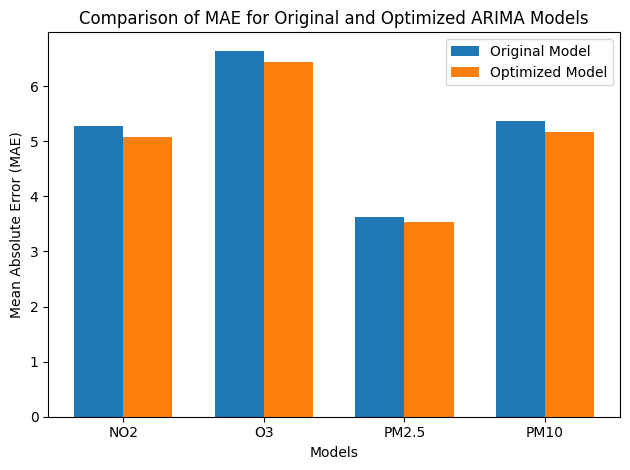

In [67]:
#Comparision between original And Optimal values for MAE scores

import matplotlib.pyplot as plt

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mae = [mae_no2, mae_o3, mae_pm25, mae_pm10]
optimized_mae = [optimized_mae_no2, optimized_mae_o3, optimized_mae_pm25, optimized_mae_pm10]

bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mae, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mae, bar_width, label='Optimized Model')

# Next I am Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison of MAE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


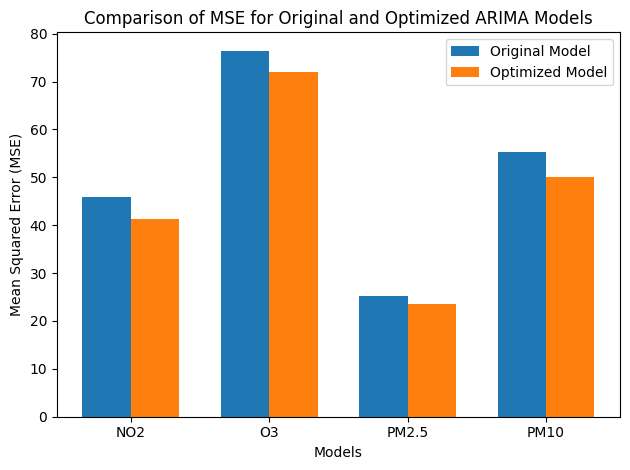

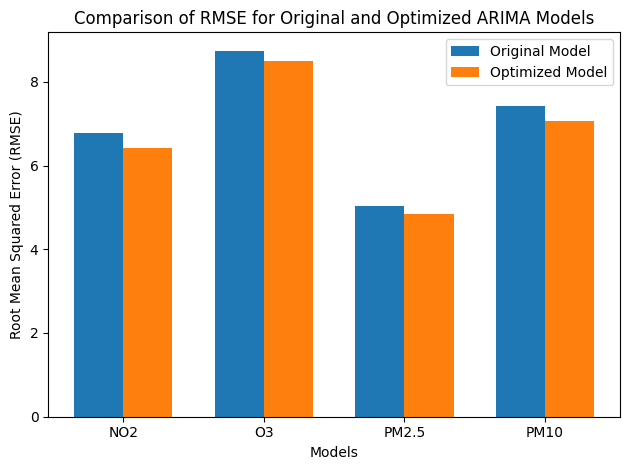

In [68]:
#Similarly I am doing this for MSE and RMSE

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mse = [mse_no2, mse_o3, mse_pm25, mse_pm10]
optimized_mse = [optimized_mse_no2, optimized_mse_o3, optimized_mse_pm25, optimized_mse_pm10]


bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of MSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


original_rmse = [rmse_no2, rmse_o3, rmse_pm25, rmse_pm10]
optimized_rmse = [optimized_rmse_no2, optimized_rmse_o3, optimized_rmse_pm25, optimized_rmse_pm10]


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_rmse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_rmse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax.set_title('Comparison of RMSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


###DISPLAYING FORCASTED DATA

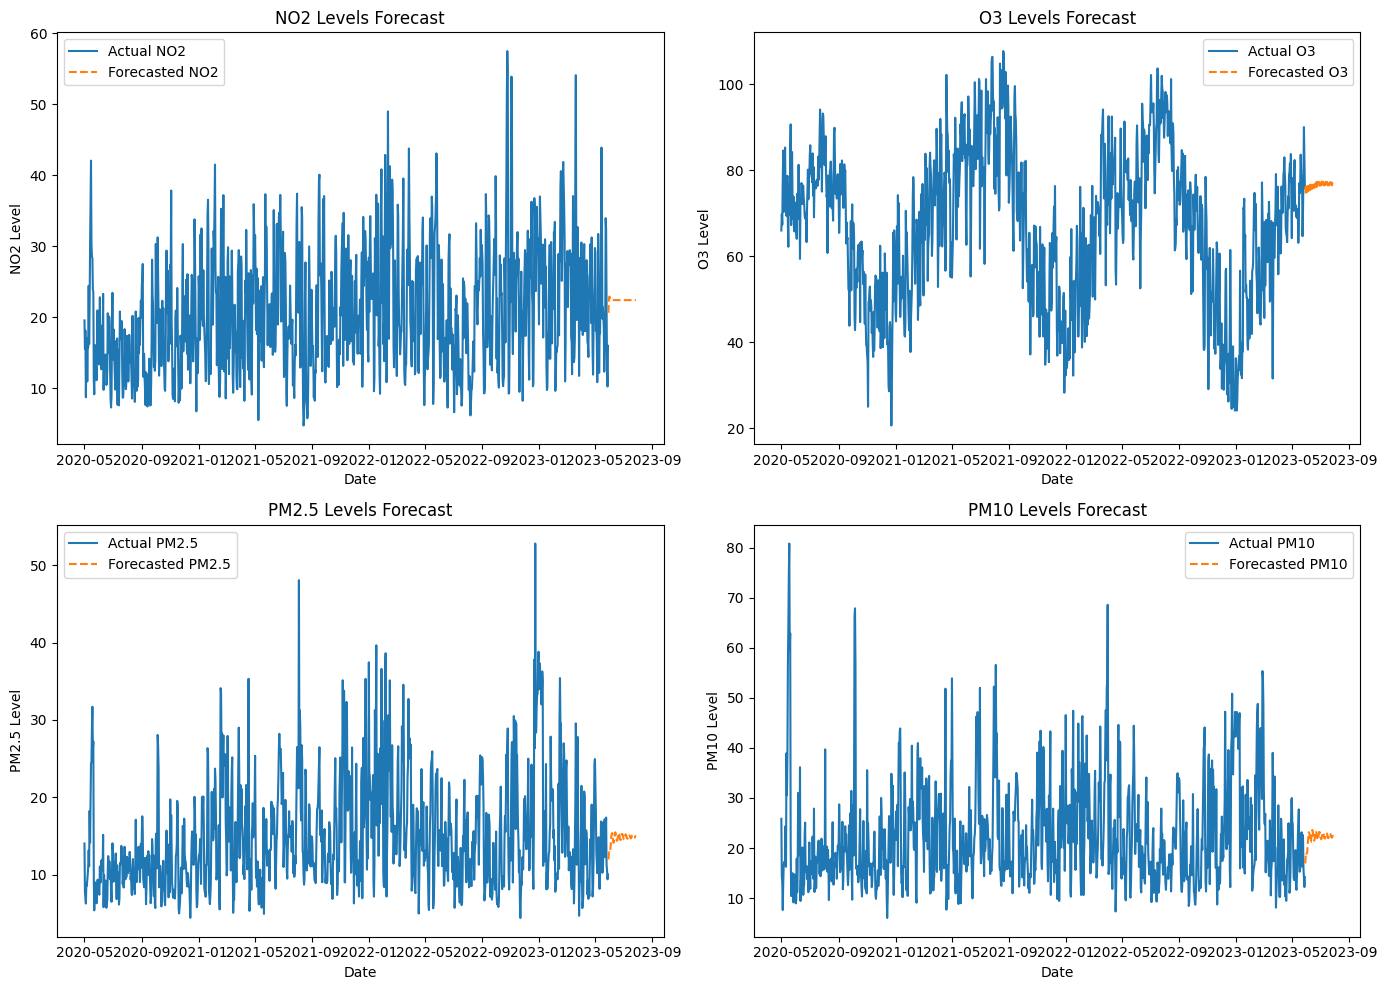

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# NO2
plt.subplot(2, 2, 1)
plt.plot(no2_data, label='Actual NO2')
plt.plot(forecast_no2_optimized.index, forecast_no2_optimized, label='Forecasted NO2', linestyle='--')
plt.title('NO2 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

# O3
plt.subplot(2, 2, 2)
plt.plot(o3_data, label='Actual O3')
plt.plot(forecast_o3_optimized.index, forecast_o3_optimized, label='Forecasted O3', linestyle='--')
plt.title('O3 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()

# PM2.5
plt.subplot(2, 2, 3)
plt.plot(pm25_data, label='Actual PM2.5')
plt.plot(forecast_pm25_optimized.index, forecast_pm25_optimized, label='Forecasted PM2.5', linestyle='--')
plt.title('PM2.5 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()

# PM10
plt.subplot(2, 2, 4)
plt.plot(pm10_data, label='Actual PM10')
plt.plot(forecast_pm10_optimized.index, forecast_pm10_optimized, label='Forecasted PM10', linestyle='--')
plt.title('PM10 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
import pandas as pd
# NO2
forecast_no2_df = pd.DataFrame({
    'Date': forecast_no2_optimized.index,
    'Predicted NO2': forecast_no2_optimized.values
})
forecast_no2_df.to_csv('forecast_no2.csv', index=False)

# O3
forecast_o3_df = pd.DataFrame({
    'Date': forecast_o3_optimized.index,
    'Predicted O3': forecast_o3_optimized.values
})
forecast_o3_df.to_csv('forecast_o3.csv', index=False)

# PM2.5
forecast_pm25_df = pd.DataFrame({
    'Date': forecast_pm25_optimized.index,
    'Predicted PM2.5': forecast_pm25_optimized.values
})
forecast_pm25_df.to_csv('forecast_pm25.csv', index=False)

# PM10
forecast_pm10_df = pd.DataFrame({
    'Date': forecast_pm10_optimized.index,
    'Predicted PM10': forecast_pm10_optimized.values
})
forecast_pm10_df.to_csv('forecast_pm10.csv', index=False)


In [71]:
import pandas as pd
# Read the individual forecast files
forecast_no2 = pd.read_csv('forecast_no2.csv')
forecast_o3 = pd.read_csv('forecast_o3.csv')
forecast_pm25 = pd.read_csv('forecast_pm25.csv')
forecast_pm10 = pd.read_csv('forecast_pm10.csv')

# Merge the dataframes based on 'Date'
merged_forecast = forecast_no2.merge(forecast_o3, on='Date', how='outer') \
                               .merge(forecast_pm25, on='Date', how='outer') \
                               .merge(forecast_pm10, on='Date', how='outer')

# Save the merged forecast to a single CSV file
merged_forecast.to_csv('merged_forecast.csv', index=False)


##INTERPRETATION

The NO2 model has relatively low AIC and BIC values, suggesting a **Good** **fit** with a balance between accuracy and complexity. The MAE and RMSE values are moderate, indicating **Decent** predictive accuracy.

The O3 model has the highest AIC and BIC values, indicating it might be the **least well-fitted model** among the four. The higher MAE, MSE, and RMSE values suggest this model has larger errors and is **Less accurate** in its predictions compared to the other models.

The PM2.5 model has the **Lowest** AIC and BIC values, indicating it is likely the **Best-fitting model** among the four. The **Lowest** MAE, MSE, and RMSE values also suggest it has the highest predictive accuracy.

The PM10 model has **Higher** AIC and BIC values compared to the NO2 and PM2.5 models but lower than the O3 model. The MAE, MSE, and RMSE values are moderate, suggesting it **performs better than the O3 model** but not as well as the PM2.5 and NO2 models.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00

Training and evaluating model for NO2...
RMSE for NO2: 14.625366971606875
MSE for NO2: 213.90135905416926
MAE for NO2: 10.043591841358078


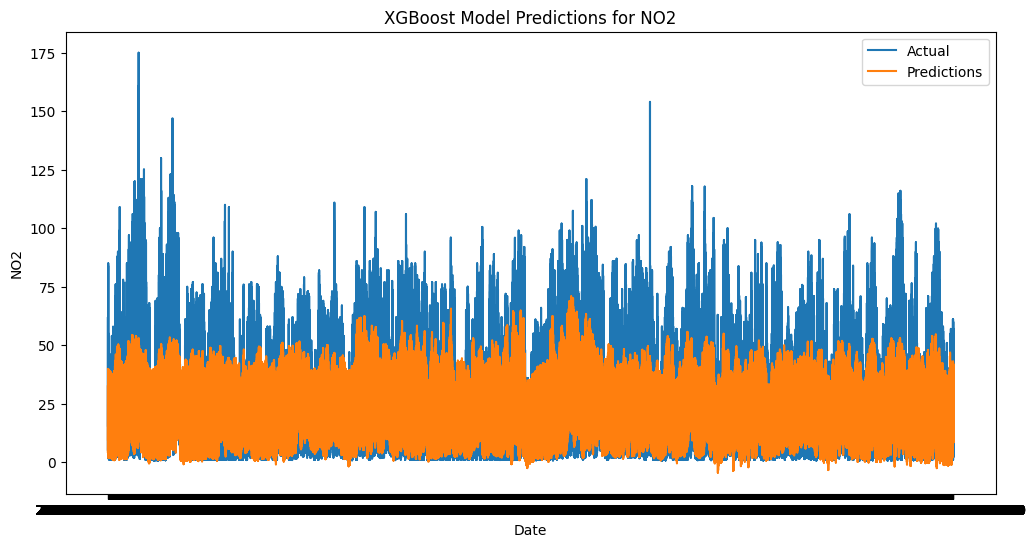


Training and evaluating model for O3...
RMSE for O3: 18.39988581505002
MSE for O3: 338.55579800687894
MAE for O3: 14.308712736595783


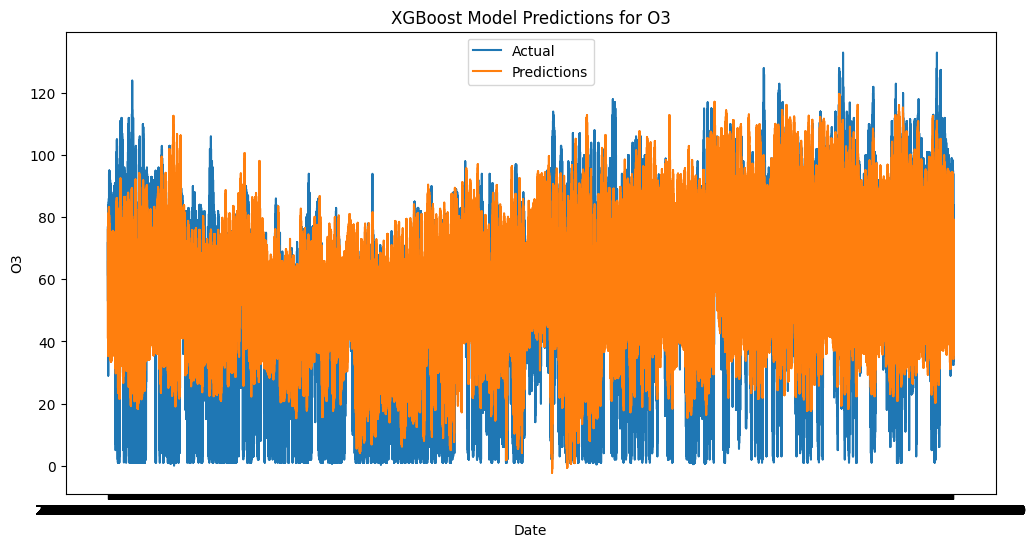


Training and evaluating model for PM10...
RMSE for PM10: 17.12754313458302
MSE for PM10: 293.352733827002
MAE for PM10: 10.652621193389725


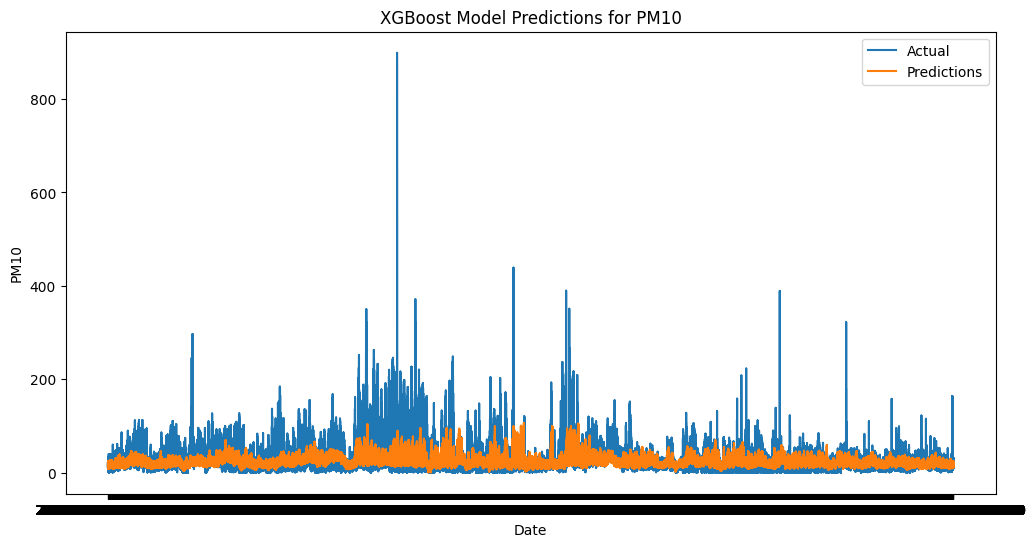


Training and evaluating model for PM2.5...
RMSE for PM2.5: 19.910594106450883
MSE for PM2.5: 396.4317576718367
MAE for PM2.5: 7.884592669046675


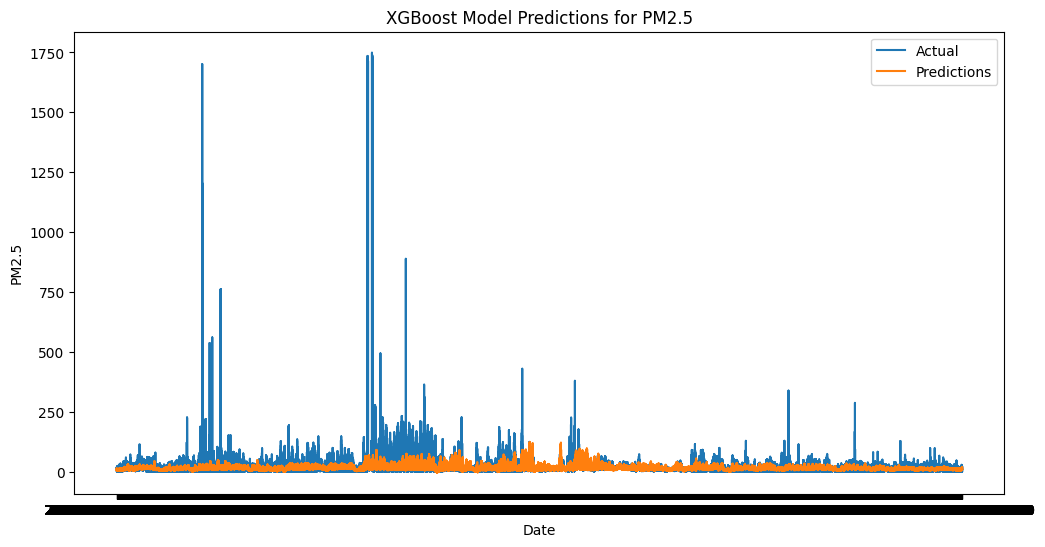

In [72]:
# Ensuring xgboost is installed
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Load the dataset
data = pd.read_csv("/content/aqi_cleaned.csv")
# Sort the dataset by Date
data_sorted = data.sort_values(by='Date', ascending=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extract features and target columns
features = ['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']
target_columns = ['NO2', 'O3', 'PM10', 'PM2.5']

# Train and evaluate the XGBoost model for each target column
for target in target_columns:
    print(f"\nTraining and evaluating model for {target}...")

    # Prepare the training and testing data
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialize and train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'RMSE for {target}: {rmse}')
    print(f'MSE for {target}: {mse}')
    print(f'MAE for {target}: {mae}')

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'], y_test, label='Actual')
    plt.plot(test_data['Date'], predictions, label='Predictions')
    plt.title(f'XGBoost Model Predictions for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()

In [73]:
data.head()

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
1,2020-05-01 00:00:00,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745,52.892704,Moderate,2
2,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092,189.983140,Very Unhealthy,4
3,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787,189.983140,Very Unhealthy,4
4,2020-05-01 00:00:00,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020,43.622113,Good,1


Epoch 1/2
43160/43160 [==============================] - 1753s 41ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 2/2
10789/10789 [==============================] - 153s 14ms/step
Train Score: 224.17 RMSE
Test Score: 247.41 RMSE


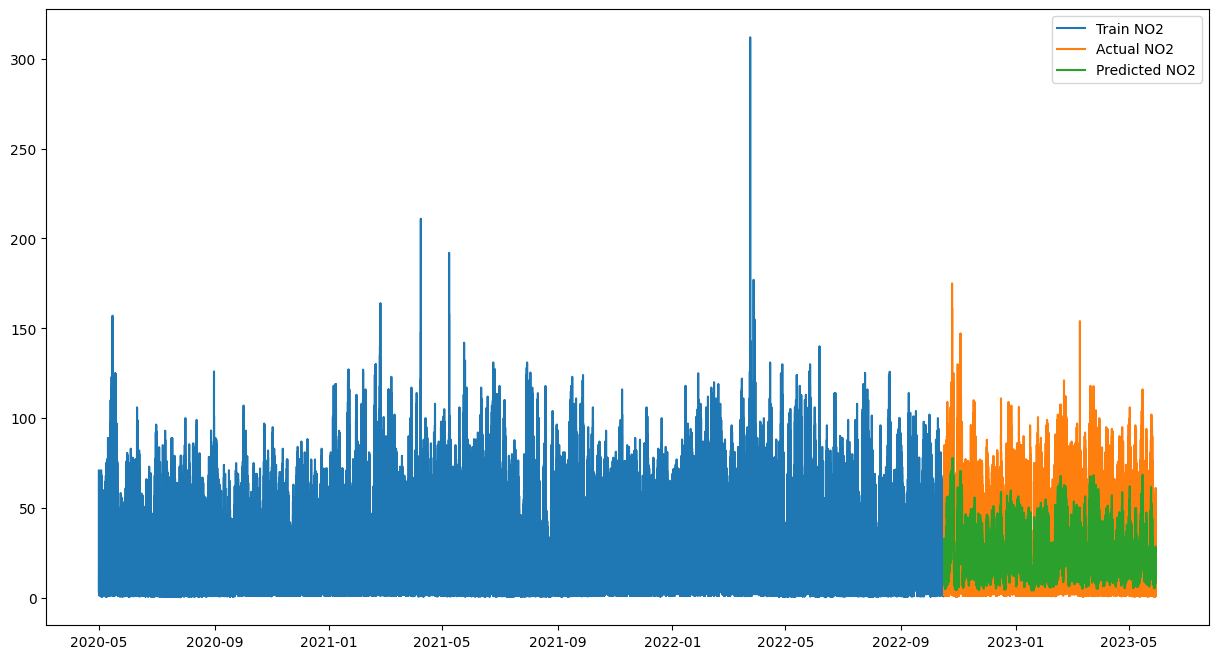

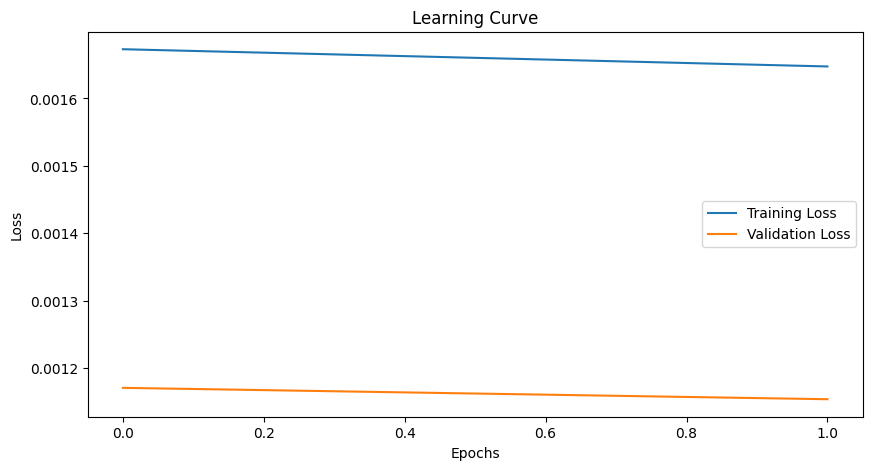

1/1 [==============================] - 0s 28ms/step


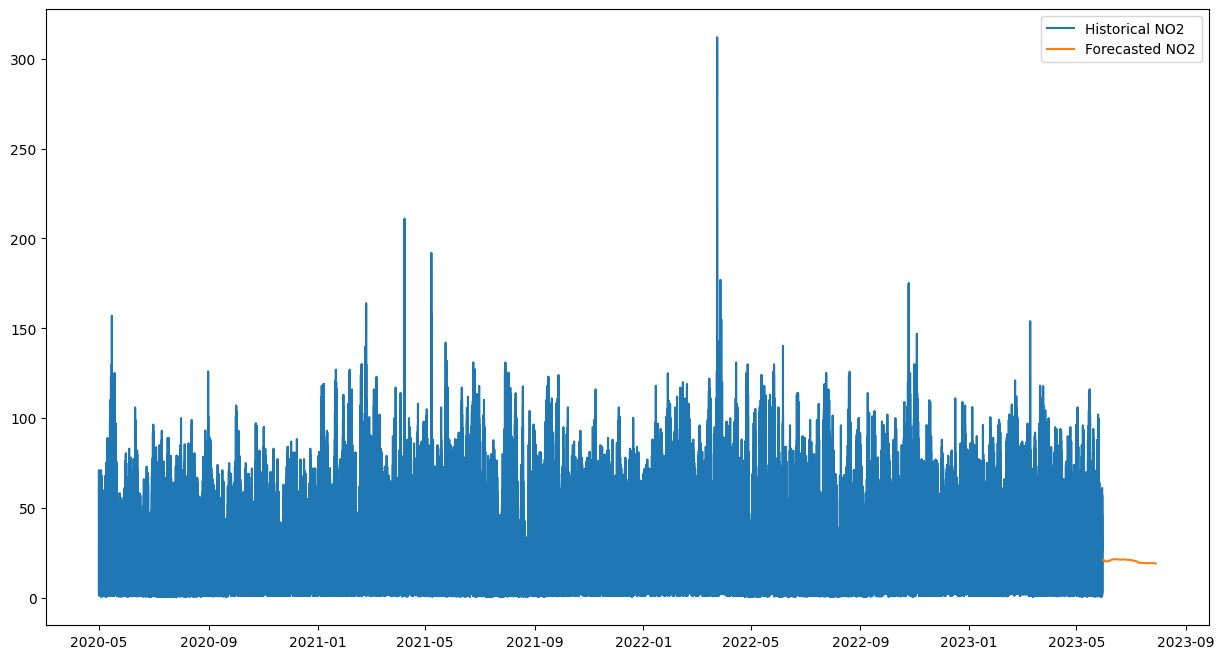

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Load the data
file_path = '/content/aqi_cleaned.csv'
data = pd.read_csv(file_path)

# Parse dates
data['Date'] = pd.to_datetime(data['Date'])

# Set date as index
data.set_index('Date', inplace=True)

# Select relevant columns
cols = ['NO2', 'O3', 'PM2.5', 'PM10']
data = data[cols]

# Handle missing values
data = data.fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the data to a supervised learning problem
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Define time step
time_step = 60

# Split data into training and test sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Create datasets for LSTM
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, len(cols))))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(len(cols)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate the model
train_score = mean_squared_error(y_train_inv, train_predict)
test_score = mean_squared_error(y_test_inv, test_predict)
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Plot predictions
plt.figure(figsize=(15, 8))
plt.plot(data.index[:train_size], scaler.inverse_transform(data_scaled[:train_size])[:, 0], label='Train NO2')
plt.plot(data.index[train_size:train_size+len(test_predict)], scaler.inverse_transform(data_scaled[train_size:train_size+len(test_predict)])[:, 0], label='Actual NO2')
plt.plot(data.index[train_size+time_step:train_size+time_step+len(test_predict)], test_predict[:, 0], label='Predicted NO2')
plt.legend()
plt.show()

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

# Forecast next 60 days
last_data = data_scaled[-time_step:]
last_data = last_data.reshape(1, time_step, len(cols))

future_forecast = []
for _ in range(60):
    prediction = model.predict(last_data)
    future_forecast.append(prediction[0])
    last_data = np.append(last_data[:, 1:, :], prediction.reshape(1, 1, len(cols)), axis=1)

future_forecast = scaler.inverse_transform(future_forecast)
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot the forecast
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['NO2'], label='Historical NO2')
plt.plot(future_dates, future_forecast[:, 0], label='Forecasted NO2')
plt.legend()
plt.show()

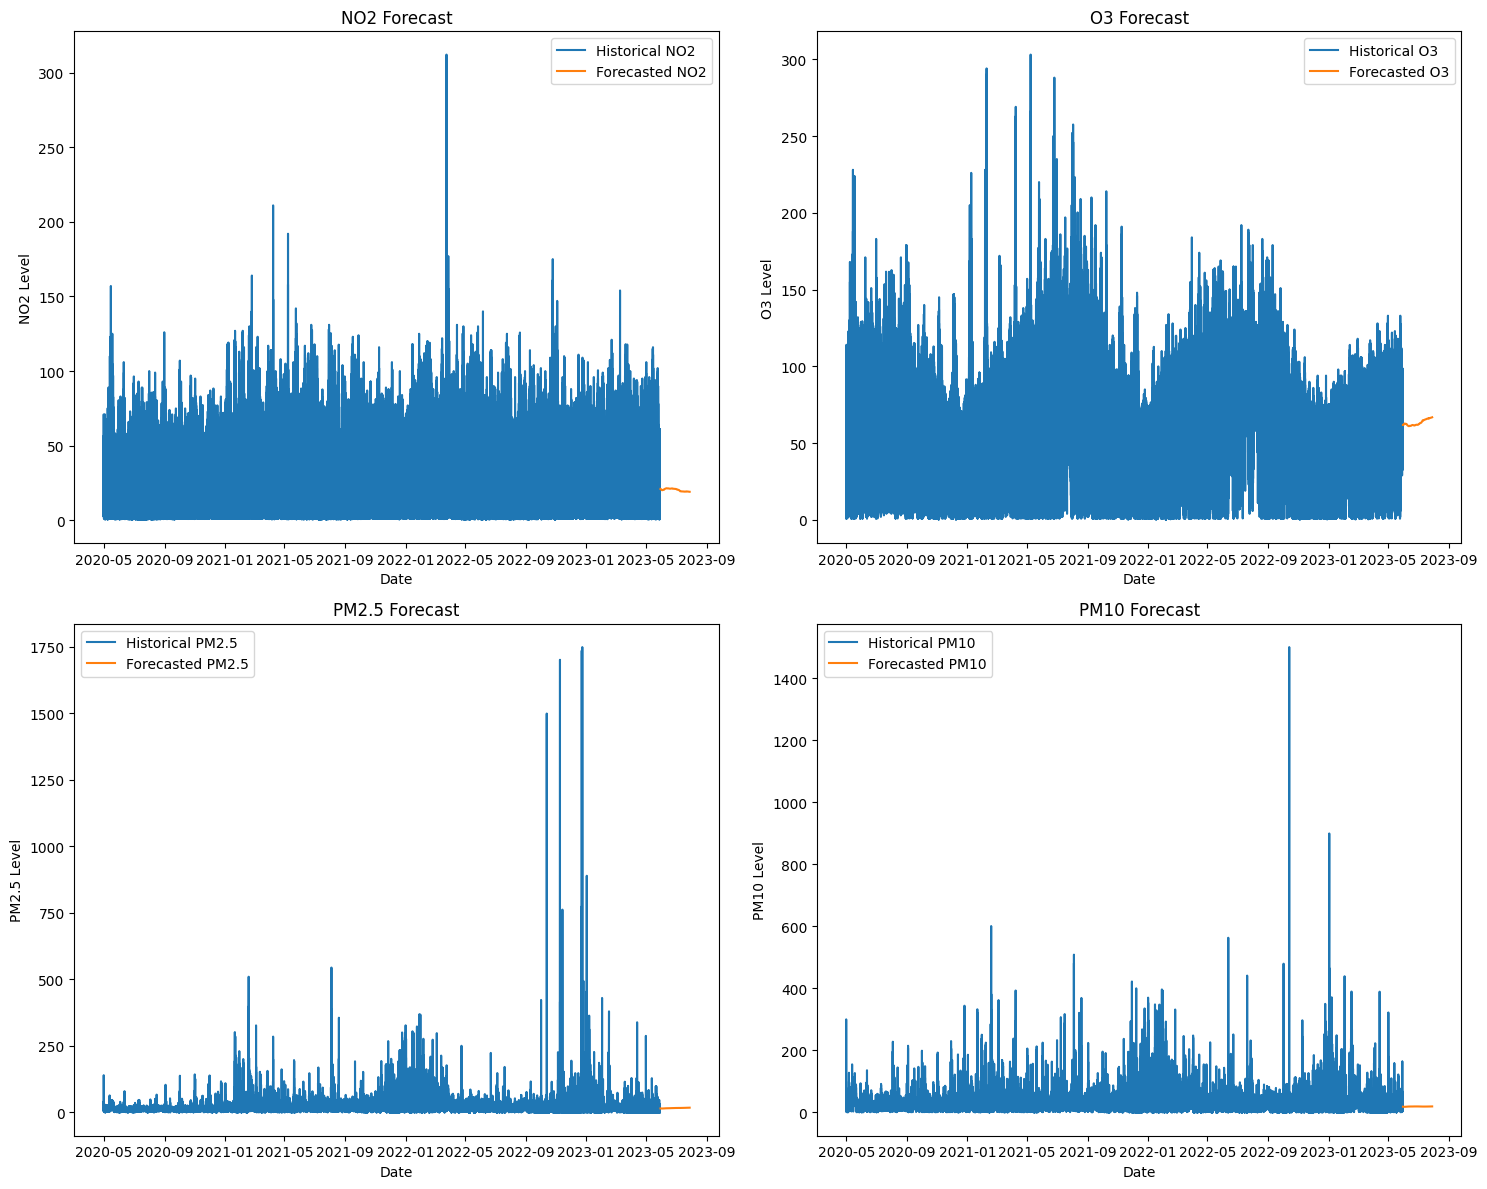

In [75]:
# Plot the forecasts for all pollutants
plt.figure(figsize=(15, 12))

# NO2
plt.subplot(2, 2, 1)
plt.plot(data.index, data['NO2'], label='Historical NO2')
plt.plot(future_dates, future_forecast[:, 0], label='Forecasted NO2')
plt.title('NO2 Forecast')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

# O3
plt.subplot(2, 2, 2)
plt.plot(data.index, data['O3'], label='Historical O3')
plt.plot(future_dates, future_forecast[:, 1], label='Forecasted O3')
plt.title('O3 Forecast')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()

# PM2.5
plt.subplot(2, 2, 3)
plt.plot(data.index, data['PM2.5'], label='Historical PM2.5')
plt.plot(future_dates, future_forecast[:, 2], label='Forecasted PM2.5')
plt.title('PM2.5 Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()

# PM10
plt.subplot(2, 2, 4)
plt.plot(data.index, data['PM10'], label='Historical PM10')
plt.plot(future_dates, future_forecast[:, 3], label='Forecasted PM10')
plt.title('PM10 Forecast')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.legend()

plt.tight_layout()
plt.show()


In [76]:
# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(future_forecast, columns=['NO2', 'O3', 'PM2.5', 'PM10'])
forecast_df['Date'] = future_dates
forecast_df.set_index('Date', inplace=True)

# Print the DataFrame
print(forecast_df)

# Save the DataFrame to a CSV file
forecast_df.to_csv('future_forecast.csv')


                           NO2         O3      PM2.5       PM10
Date                                                           
2023-05-30 23:00:00  21.040904  61.847943  15.075721  18.501362
2023-05-31 23:00:00  20.924987  61.841690  15.061755  18.360359
2023-06-01 23:00:00  20.412271  62.479837  14.937086  18.249396
2023-06-02 23:00:00  20.216101  62.729228  14.906222  18.213873
2023-06-03 23:00:00  20.242041  62.740574  14.939975  18.243159
2023-06-04 23:00:00  20.375639  62.647919  15.008602  18.319720
2023-06-05 23:00:00  20.578826  62.429979  15.107687  18.428947
2023-06-06 23:00:00  20.494129  62.558826  15.141194  18.536601
2023-06-07 23:00:00  20.781922  62.129096  15.279682  18.672914
2023-06-08 23:00:00  21.094058  61.631891  15.433188  18.812037
2023-06-09 23:00:00  21.254035  61.415947  15.538474  18.923744
2023-06-10 23:00:00  21.368853  61.187397  15.637675  19.019151
2023-06-11 23:00:00  21.495783  61.031795  15.727948  19.080123
2023-06-12 23:00:00  21.462792  61.15895

In [77]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and test sets
train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')


Train MAE: 9.23
Test MAE: 9.25


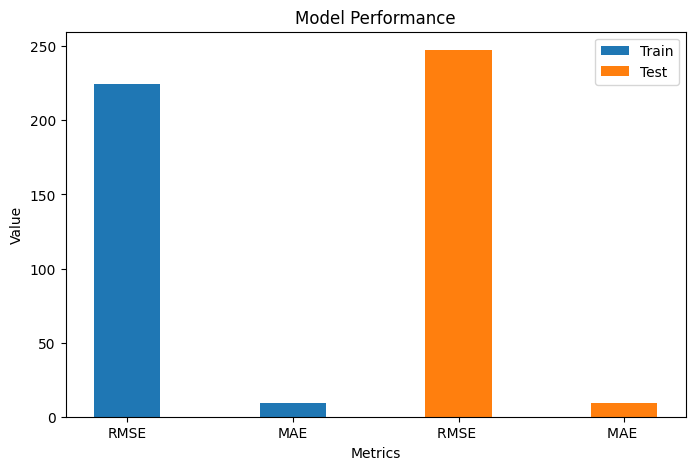

In [78]:
train_rmse = train_score
test_rmse =test_score

train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

# Visualize metrics
metrics = ['RMSE', 'MAE']
train_values = [train_rmse, train_mae]
test_values = [test_rmse, test_mae]

plt.figure(figsize=(8, 5))
plt.bar(metrics, train_values, width=0.4, label='Train')
plt.bar([m + ' ' for m in metrics], test_values, width=0.4, label='Test')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')
plt.legend()
plt.show()